# 1. Milestone 1: [ Duration: 2 weeks, Score: 20 points]

## Importing all the dependencies 

In [ ]:
#Importing numpy handle mathematical calculations and pandas for data manipulation and analysis.
import numpy as np
import pandas as pd

#Matplotlib can be used to visuvalize the data and seaborn is built on top of it
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Hypothesis tests
from scipy.stats import chi2_contingency,chisquare

#Scikit learn libraries & other Model building
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import nltk,warnings,gensim,re
from string import punctuation
nltk.download(['punkt','stopwords','wordnet','averaged_perceptron_tagger'])

import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
warnings.filterwarnings(action = 'ignore')
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, BatchNormalization,SimpleRNN,GRU
from keras.constraints import max_norm, unit_norm
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
!pip install nlpaug 
!pip install transformers
# Run this  during the first time
from transformers import XLNetConfig, XLNetModel
import transformers
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
import nlpaug.augmenter.word as naw
import nlpaug.flow as naf
from nlpaug.util import Action
!pip install tensorflow_text
import tensorflow_hub as hub
import tensorflow_text as text
from transformers import XLNetConfig, XLNetModel
from tensorflow.keras.initializers import GlorotUniform

#Drive
import warnings
from google.colab import drive
warnings.filterwarnings('ignore')
drive.mount('/content/drive/')
project_path = '/content/drive/My Drive/Data Science/NLP/Capstone'



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Step 1: Import the data 

# New Section

In [ ]:
df = pd.read_csv(project_path+'/Data.csv',index_col=False)

# Step 2: Data cleansing

* We will filter the columns that shall be used to build model. Not all the columns provided can be used to build model.

* We will rename the column headers, few are incorrectly labelled.

* We will check for duplicates and remove them if found.

* We will convert a column (Date) to a proper datatype (Datetime). This shall later be used to identify other insights.

* We will check for null values (there were no null values)

In [ ]:
df = df[['Data','Countries','Local','Industry Sector','Accident Level',
         'Potential Accident Level','Genre','Employee or Third Party','Critical Risk','Description']]

#Filter the important columns
#Step#1

In [ ]:
df.columns = ['Date', 'Countries', 'Locality', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee or Third Party',
       'Critical Risk', 'Description']
#Step#2
#Renamed the headings

df.head()

,Date,Countries,Locality,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
df[df.duplicated()]

#It displays 7 duplicates in the dataset, we will drop them

,Date,Countries,Locality,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [ ]:
df.drop_duplicates(inplace=True)

#Removed the duplicates
#Step#3

In [ ]:
df.info()

#Date is in object type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      418 non-null    object
 1   Countries                 418 non-null    object
 2   Locality                  418 non-null    object
 3   Industry Sector           418 non-null    object
 4   Accident Level            418 non-null    object
 5   Potential Accident Level  418 non-null    object
 6   Gender                    418 non-null    object
 7   Employee or Third Party   418 non-null    object
 8   Critical Risk             418 non-null    object
 9   Description               418 non-null    object
dtypes: object(10)
memory usage: 35.9+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split(" ")[0]))

# We convert date to a datetime format, this is to get few more important insights from data.

In [ ]:
df.isnull().sum()

#There is no null values

Date                        0
Countries                   0
Locality                    0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

### Exploratory Data Analysis 

In [ ]:
df.head()

# We notice 10 columns in the dataset

,Date,Countries,Locality,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
df.info()
#All the columns are in correct data type, Date is also in Datetime datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Countries                 418 non-null    object        
 2   Locality                  418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    object        
 5   Potential Accident Level  418 non-null    object        
 6   Gender                    418 non-null    object        
 7   Employee or Third Party   418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 35.9+ KB


In [ ]:
df['Accident Level'].value_counts(normalize=True)

#5 different types of accidents - Completely Unbalanced

I      0.739234
II     0.095694
III    0.074163
IV     0.071770
V      0.019139
Name: Accident Level, dtype: float64

# 1. Looking at country

In [ ]:
df['Countries'].value_counts(normalize=True)

#country 1 has the most number of records and also accidents followed by country 2 and country 3. This shows that country 1 is more
#vulnerable to accidents and country 3 is less prone to accidents but we can also take it as country_01 has 59% of records which
#is higher than country_02 and 03 so it is expected to have more accidents.

Country_01    0.593301
Country_02    0.308612
Country_03    0.098086
Name: Countries, dtype: float64

In [ ]:
df.groupby(['Countries','Accident Level'])['Description'].count()

#If we look at the severity levels,country 1 has 8 high severity level (severity v) accidents and majority of 
#those are severity I accident which is less severe, this could also be due to less number of records on other 
#countries. But here all 8 Severity V accidents happen only in country_01


Countries   Accident Level
Country_01  I                 177
            II                 19
            III                21
            IV                 23
            V                   8
Country_02  I                  98
            II                 19
            III                 7
            IV                  5
Country_03  I                  34
            II                  2
            III                 3
            IV                  2
Name: Description, dtype: int64

In [ ]:
pd.crosstab(index=df['Countries'],columns=df['Accident Level'],normalize=True)

#Our focus will be the high severity accidents that is iv and v which is displayed below. It is mostly present
#in country_01

Accident Level,I,II,III,IV,V
Countries,,,,,
Country_01,0.423445,0.045455,0.050239,0.055024,0.019139
Country_02,0.234450,0.045455,0.016746,0.011962,0.000000
Country_03,0.081340,0.004785,0.007177,0.004785,0.000000


In [ ]:
df.groupby(['Countries','Industry Sector','Accident Level'])['Description'].count()

#Country 1 has 203 mining work inputs which could be the reason for accidents. Generally we know that mining 
#has lot of accidents and deaths too. Country 3 does not have metals and mining which leads to an observation 
#that is Metals and Mining has most number of accidents.

Countries   Industry Sector  Accident Level
Country_01  Metals           I                  36
                             II                  1
                             III                 3
                             IV                  5
                             V                   1
            Mining           I                 140
                             II                 18
                             III                17
                             IV                 18
                             V                   7
            Others           I                   1
                             III                 1
Country_02  Metals           I                  71
                             II                 11
                             III                 4
                             IV                  2
            Mining           I                  23
                             II                  8
                             III      

In [ ]:
df[['Countries','Industry Sector']].value_counts(normalize=True)

#Country01 has 47% of mining,10% Metals and 0.4% of others
#Country02 has 20% metals,8.9% mining and 0.9% others
#Country03 has 10% of others

Countries   Industry Sector
Country_01  Mining             0.478469
Country_02  Metals             0.210526
Country_01  Metals             0.110048
Country_03  Others             0.098086
Country_02  Mining             0.088517
            Others             0.009569
Country_01  Others             0.004785
dtype: float64

# Hypothesis test to confirm on Accidents occurance on different days

## Ha : The number of accidents on multiple number of days look the same
## Ho : The number of accidents are different on different days

In [ ]:
df['Day'] = df['Date'].dt.dayofweek
df.groupby(['Day','Accident Level'])['Accident Level'].count()

# The number of accidents looks almost the same in all days

Day  Accident Level
0    I                 37
     II                 7
     III                9
1    I                 54
     II                 5
     III                2
     IV                 8
2    I                 46
     II                 9
     III                2
     IV                 1
     V                  4
3    I                 65
     II                 3
     III                2
     IV                 6
4    I                 44
     II                 7
     III                4
     IV                 6
5    I                 34
     II                 7
     III                7
     IV                 4
     V                  4
6    I                 29
     II                 2
     III                5
     IV                 5
Name: Accident Level, dtype: int64

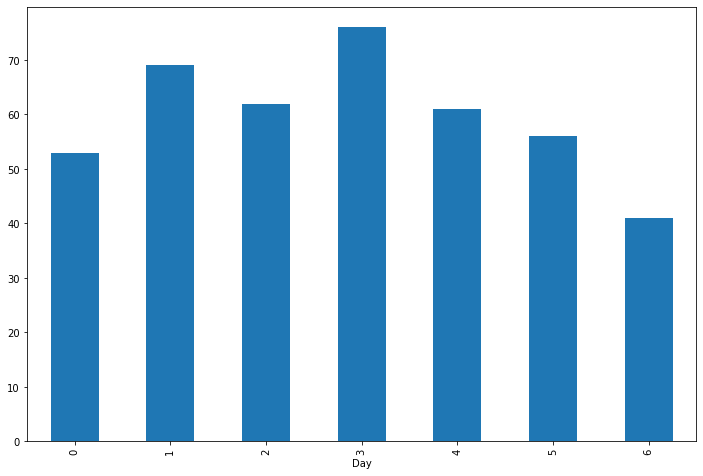

In [ ]:
plt.figure(figsize=(12,8))
df.groupby(['Day'])['Accident Level'].count().plot(kind='bar')

In [ ]:
dd = pd.DataFrame(df.groupby(['Countries','Day'])['Accident Level'].count())
l=[i for i in dd['Accident Level']]

In [ ]:
chi2 ,p,dof,a = chi2_contingency(np.array(l))

In [ ]:
if p <0.5:
    print("The number of accidents on multiple number of days look the same")
else:
    print("The number of accidents are different on different days")

The number of accidents are different on different days



## Mostly its Tuesday or Thursday or Friday when accidents occur the most, we will inform the companies to be more cautious on these days and have more first aid kits to help on any accidents

## On top of this we notice that severity v accidents occur on Tuesday and Friday and severity iv is widespread from Monday to Saturday

# Lets look at monthly level of accidents

* From this we can guess that someone joining in the start of the year as a fresher in any industry ends up committing lot of mistakes leading to injuries and sometimes even death. For eg: Someone joining mining industry for the very first time ends up having high severity injuries as they might not know how to operate. Once they get used to work they gradually end up working safer which leads to lesser accidents in the later part of the year.


* On the other hand we can also look at it with seasons, the summer seasons lead to a lot of dry conditions which might lead to fire accidents easily and at the same time there is scarcity of water as well which might lead to workers having heat stroke.

In [ ]:
df['Month'] = df['Date'].dt.month

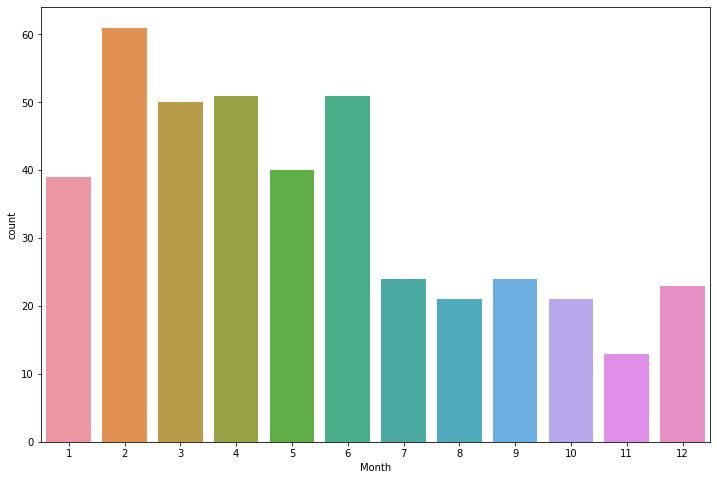

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Month'])

#Feburary month seems to have a lot of accidents in general than end of the year. 

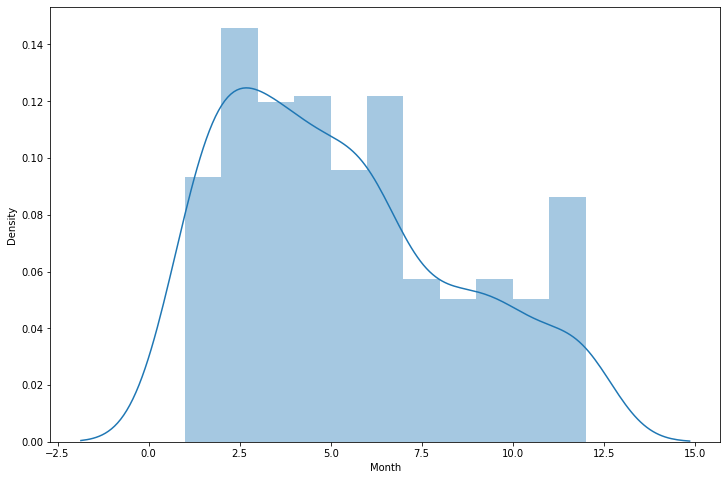

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['Month'])

# 2. Looking at Locality

In [ ]:
df.groupby(['Locality','Industry Sector'])['Description'].count().sort_values()

#Locality 12,09,11 has the least number of accidents and 03,05 and 01 has most number of accidents and both
#of these are present in country_01 and country_02. Country_03 has only one, locality_10

Locality  Industry Sector
Local_09  Metals              2
Local_11  Others              2
Local_12  Others              4
Local_07  Mining             14
Local_02  Mining             23
Local_08  Metals             27
Local_10  Others             41
Local_06  Metals             46
Local_04  Mining             55
Local_01  Mining             56
Local_05  Metals             59
Local_03  Mining             89
Name: Description, dtype: int64

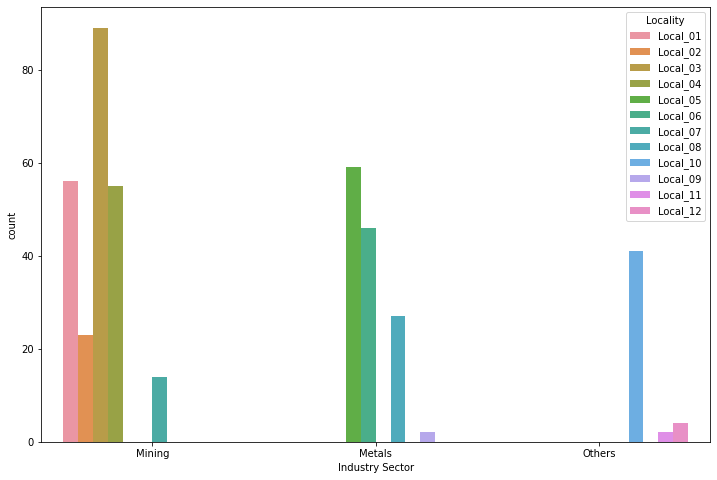

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Industry Sector'],hue=df['Locality'])

#Mining ends up taking Local_03 and Local_01 with maximum number of accidents, Metals take up Local_05

In [ ]:
df.groupby(['Industry Sector','Locality'])['Accident Level'].count()

#We notice that Locality 01 and 03 is top contributor because they do mining and Locality 05 does metallurgical work

Industry Sector  Locality
Metals           Local_05    59
                 Local_06    46
                 Local_08    27
                 Local_09     2
Mining           Local_01    56
                 Local_02    23
                 Local_03    89
                 Local_04    55
                 Local_07    14
Others           Local_10    41
                 Local_11     2
                 Local_12     4
Name: Accident Level, dtype: int64

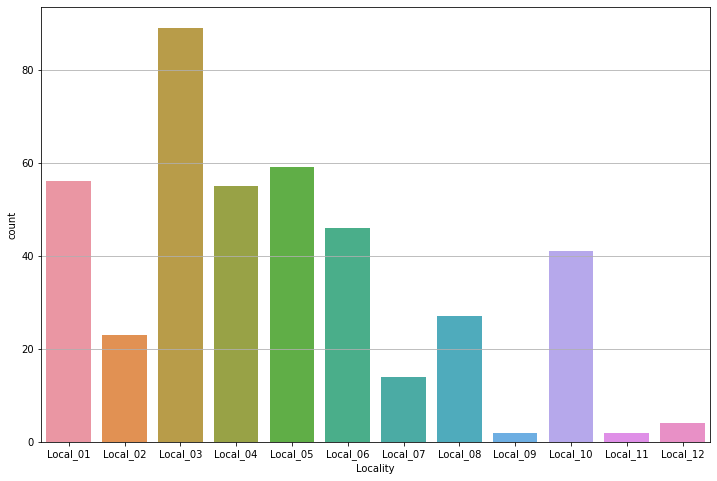

In [ ]:
plt.figure(figsize=(12,8))
plt.grid()
sns.countplot(df['Locality'].sort_values())

# 3. Industry Sector

In [ ]:
df['Industry Sector'].value_counts(normalize=True)

#This is well known that Mining happens under a man made cave with lot of dynamites etc which leads to 
#catastrophic failures leading to a lot of accidents and also most of the records are from Mining

Mining    0.566986
Metals    0.320574
Others    0.112440
Name: Industry Sector, dtype: float64

In [ ]:
df.groupby(['Industry Sector','Accident Level'])['Description'].count()

#Mining has the most number of high severity accidents, severity v = 7 accidents out of 8 and 
#severity iv 21 accidents out of 28

Industry Sector  Accident Level
Metals           I                 107
                 II                 12
                 III                 7
                 IV                  7
                 V                   1
Mining           I                 163
                 II                 26
                 III                20
                 IV                 21
                 V                   7
Others           I                  39
                 II                  2
                 III                 4
                 IV                  2
Name: Description, dtype: int64

In [ ]:
df.groupby('Accident Level')['Description'].count()

#Out of total 8 severity v accidents 7 occur in Mining
#out of total 30 severity iv accidents 21 occur in Mining
#Out of total 31 Severity III accidents, 20 occur in Mining
#Out of total 40 Severity II accidents, 26 occured in Mining
#Out of total 316 Severity I accidents, 167 occured in Mining

#On the whole more than 50% of all severity accidents occur in mining

Accident Level
I      309
II      40
III     31
IV      30
V        8
Name: Description, dtype: int64

# 4. Accident Level

In [ ]:
df['Accident Level'].value_counts(normalize=True)

#Highly imbalanced, we will have to work on balancing these while building models

I      0.739234
II     0.095694
III    0.074163
IV     0.071770
V      0.019139
Name: Accident Level, dtype: float64

# 6. Employee or Third Party 	

In [ ]:
df['Employee or Third Party'].value_counts(normalize=True)

#Third party is more prone to accidents, Employee also fall on the same bucket with just 2% less accidents

Third Party             0.442584
Employee                0.425837
Third Party (Remote)    0.131579
Name: Employee or Third Party, dtype: float64

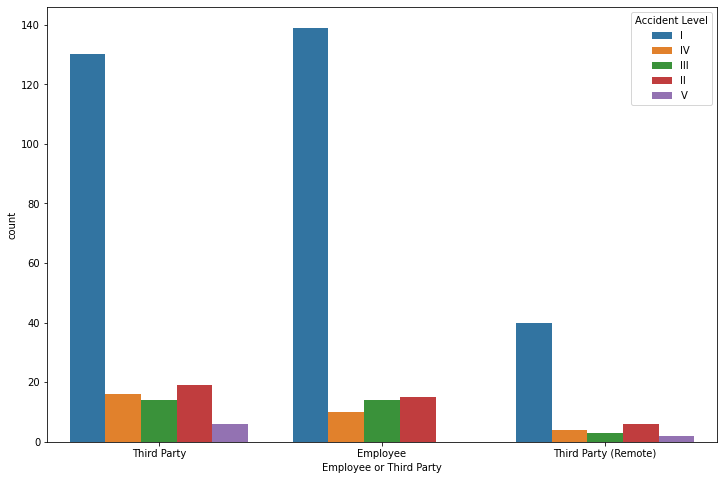

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Employee or Third Party'],hue=df['Accident Level'])

#We have high severe accidents "Accident V" in Thirdparty and Third party remote
#Employee have only severity i accident the most and less number of severity ii, iii, iv accidents which
#means there are safety standarad protocols for Employees than contractual third party workers

# 7. Critical Risk 	

In [ ]:
df.groupby('Critical Risk')['Description'].count().sort_values(ascending=False)

# we notice others has the most contribution to accidents

Critical Risk
Others                                       229
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Cut                                           14
Venomous Animals                              13
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Pressurized Systems                            7
remains of choco                               7
Fall prevention (same level)                   7
Fall prevention                                6
Suspended Loads                                6
Pressurized Systems / Chemical Substances      3
Blocking and isolation of energies             3
Power lock                                     3
Liquid Metal                                   3
Machine Protection                             2
Electr

In [ ]:
df.groupby(['Critical Risk','Industry Sector'])['Accident Level'].count().sort_values(ascending=False)

Critical Risk                              Industry Sector
Others                                     Mining             176
                                           Metals              33
                                           Others              20
Pressed                                    Metals              17
Chemical substances                        Metals              15
Manual Tools                               Metals              14
Venomous Animals                           Others              10
Cut                                        Metals              10
Bees                                       Others              10
Projection                                 Mining               9
Vehicles and Mobile Equipment              Mining               8
Pressed                                    Mining               7
remains of choco                           Mining               7
Fall prevention (same level)               Metals               6
Pressurized Syste

## Analyzing the Length of sentence 

In [ ]:
df['Length'] = df['Description'].apply(lambda x: len(x))
df.groupby('Accident Level')['Length'].mean()

#Anyone who enters more number of sentences has a lot to explain about the high severity of accident in detail,
#this can be seen here

Accident Level
I      352.974110
II     316.675000
III    442.000000
IV     436.166667
V      527.500000
Name: Length, dtype: float64

* Accidents mostly occur on 1st (Mondays) and 3rd (Wednesdays) days

* Feb - June has the most number of accidents and post june it reduces

* Locality 03,05 & 01 has the most number of accidents

* Mining has high severity iv and v accidents

* Third party must have safety protocols

# From EDA, the below are the inferences:

* There are totally 425 rows of data, we are unsure if this is enough to train the model but the target column Accident level is completely imbalanced. We might have to balance the classes before training a model or apply Data augmentation technique


* The country_01 has the most number of accidents and records followed by 02 and 03 


* In terms of Locality the accidents are almost evenly spread but most of the issues are in Locality 03,05,01


* The mining industry has the most number of accidents than the metals and other options.


* The people working in Third Party and as a Employee face a lot of accidents than Third party remote, this is due to least number of people being a part of Thirdparty remote category


* Some of the features such as Industry sector, Employee type and critical risk can be appended in the description to have the model ready for any kind of inputs 


* Any description that has length >500 leads to the highest severity accident V which leads one to explain on the accident from start to end in detail. The lowest or least severity accident can be explained in simple terms which takes only 352 words.

## Strict rules and safety protocols needs to be implemented for the below mentioned pointers: 

### 1. 1st and 3rd day of the week as we notice a lot of accidents during this time.

### 2. Summer season seems to have a lot of accidents, its not only due to industry accidents, it can also be due to drought conditions. We know that Coal mining or any other industry leads to reduction or contamination of ground water which is the major source for drinking water. It can lead to workers not having water to drink  or bad quality of water and ultimately leading to health issues or heat stroke. The industries should come up with better rules and regulations during these times.

### 3. Mining and metallurgical industries should have strict rules and safety protocols , similarly Locality 03, 05 & 01 should also have a lot of focus as it is more prone to frequent accidents

### 4. Third party workers must also be given importance to reduce accidents.

# On the whole if a worker from Country 01, from locality 03 or 05 or 01, works in mining industry during the summer season and belongs to a third party employee group  then  their chances of getting into accident is more and if they come to work on Tuesday's and Thursdays there are chances of high severity accidents

# Step 3: Data preprocessing

* Before we proceed to data preprocessing we will work on adding or concatenating some of the terms into description, this can be industry sector, Employee type and Critical risk as some of the customers might also type these terms. 


* Eg: A person migh type "An employee working in pressurized Systems in mining industry", this sentence contains "Mining" and "Presurrized systems" which actually might not be present in the description but can be expected from a customer/end user.


* We will try to use both the descriptions, without concatenation and with concatenation

In [ ]:
def data(x,y,z,a):
    return x+" "+y+" "+z+" "+a

df['Description_1'] = df.apply(lambda x: data(x['Industry Sector'],x['Employee or Third Party'],x['Critical Risk'],x['Description']),axis=1)

In [ ]:
df.sample(3)

#We will use Description_1 and Description too

,Date,Countries,Locality,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Day,Month,Length,Description_1
332,2017-02-17,Country_01,Local_01,Mining,I,III,Male,Employee,Chemical substances,Once the painting of the pumping pipe has been...,4,2,391,Mining Employee Chemical substances Once the p...
267,2016-12-10,Country_01,Local_04,Mining,I,II,Male,Third Party,Others,"At 18:40 hours, in moments when Mr. Claudio ti...",5,12,362,"Mining Third Party Others At 18:40 hours, in m..."
390,2017-05-16,Country_02,Local_05,Metals,I,III,Female,Third Party (Remote),Cut,The maid was handling a pipette for sample pre...,1,5,196,Metals Third Party (Remote) Cut The maid was h...


## Steps while preprocessing the text, steps 1 - 4 will be done in all cases

1. Lower case the entire sentence
2. Remove punctuations and HTML Symbols etc
3. Remove Stopwords
4. Apply Stemming or Lemmatization
5. Convert words to vectors
    * Use Count Vectorizer
    * Use TF-IDF
    * Use Word2Vec
    * Use Glove

In [ ]:
# Step1 - Lower casing the words and removing the unnecessary symbols & Punctuation as it does not add to prediction. 
# Step2 - Remove stopwords

def remove_stopwords(x):
    x = re.sub(r"[\u200bâ€°]+","",x.lower())
    return " ".join(i for i in nltk.word_tokenize("".join([i for i in x if i not in punctuation ])) if i not in stopwords.words('english'))

In [ ]:
df['Description'] = df['Description'].apply(remove_stopwords)
df['Description_1'] = df['Description_1'].apply(remove_stopwords)
# Applying it to the columns Description - without concatenation and Description_1 - with concatenation

In [ ]:
# Step4 - Apply Stemming and Lemmatization
ps=PorterStemmer()
lm=WordNetLemmatizer()
def stemming(x):
    return ps.stem(x)

def lemmatized(x):
    return lm.lemmatize(x)

In [ ]:
df['Description_1Stemmed'] = df['Description_1'].apply(stemming)
df['Description_1lemmatized'] = df['Description_1'].apply(lemmatized)

df['Description_Stemmed'] = df['Description'].apply(stemming)
df['Description_lemmatized'] = df['Description'].apply(lemmatized)

#Applying stemming and lemmatization on both the columns

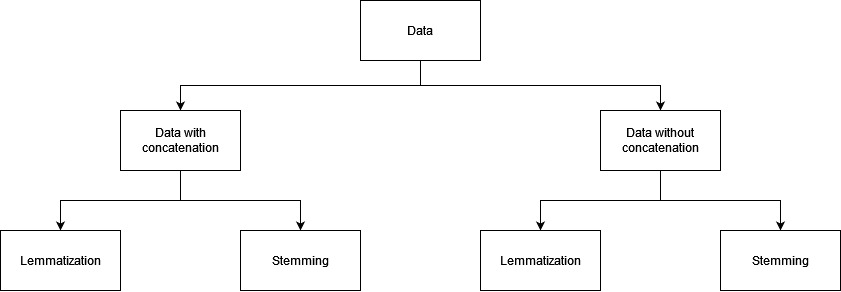

In [ ]:
df.head()

,Unnamed: 0,Date,Countries,Locality,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Day,Month,Length,Description_1,Description_1Stemmed,Description_1lemmatized,Description_Stemmed,Description_lemmatized
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,removing drill rod jumbo 08 maintenance superv...,4,1,457,mining third party pressed removing drill rod ...,mining third party pressed removing drill rod ...,mining third party pressed removing drill rod ...,removing drill rod jumbo 08 maintenance superv...,removing drill rod jumbo 08 maintenance superv...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,activation sodium sulphide pump piping uncoupl...,5,1,307,mining employee pressurized systems activation...,mining employee pressurized systems activation...,mining employee pressurized systems activation...,activation sodium sulphide pump piping uncoupl...,activation sodium sulphide pump piping uncoupl...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,substation milpo located level 170 collaborato...,2,1,314,mining third party remote manual tools substat...,mining third party remote manual tools substat...,mining third party remote manual tools substat...,substation milpo located level 170 collaborato...,substation milpo located level 170 collaborato...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,945 approximately nv 1880 cx695 ob7 personnel ...,4,1,562,mining third party others 945 approximately nv...,mining third party others 945 approximately nv...,mining third party others 945 approximately nv...,945 approximately nv 1880 cx695 ob7 personnel ...,945 approximately nv 1880 cx695 ob7 personnel ...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,approximately 1145 circumstances mechanics ant...,6,1,487,mining third party others approximately 1145 c...,mining third party others approximately 1145 c...,mining third party others approximately 1145 c...,approximately 1145 circumstances mechanics ant...,approximately 1145 circumstances mechanics ant...


## Stemmed Data

In [ ]:
# Data1 - Count vectorizer - Stemmed data - with concatenated data
cv = CountVectorizer()
cv_data = cv.fit(df['Description_1Stemmed'])
data1 = cv_data.transform(df['Description_1Stemmed'])

In [ ]:
data1.toarray().shape

(418, 3487)

In [ ]:
# Data2 - Count vectorizer - Stemmed data- without concatenated data
cv1 = CountVectorizer()
cv_data1 = cv1.fit(df['Description_Stemmed'])
data2 = cv_data1.transform(df['Description_Stemmed'])

In [ ]:
data2.toarray().shape

(418, 3465)

In [ ]:
# Data3 - TFIDF vectorizer - Stemmed data- without concatenated data
tfidf = TfidfVectorizer()
tfidf_1 = tfidf.fit_transform(df['Description_Stemmed'])
tfidf_1.toarray().shape

(418, 3465)

In [ ]:
# Data4 - TFIDF vectorizer - Stemmed data - with concatenated data
tfidf1 = TfidfVectorizer()
tfidf_2 = tfidf.fit_transform(df['Description_1Stemmed'])
tfidf_2.toarray().shape

(418, 3487)

In [ ]:
# Data5 - Word2vec - Stemmed data - with concatenated data
data_list = []
for i in df['Description_1Stemmed']:
    data_list.append(nltk.word_tokenize(i))
    
w2v = Word2Vec(sentences=data_list,size=100)    

In [ ]:
w2v.wv.similar_by_word('hand')

[('moment', 0.9998654127120972),
 ('right', 0.9998505711555481),
 ('activity', 0.9998483657836914),
 ('floor', 0.9998412728309631),
 ('area', 0.9998409748077393),
 ('operator', 0.9998395442962646),
 ('left', 0.9998393058776855),
 ('employee', 0.9998329877853394),
 ('side', 0.9998326301574707),
 ('time', 0.9998308420181274)]

In [ ]:
w2v.wv.get_vector('hand')

array([ 0.24763535,  0.05167529,  0.5600804 , -0.01794475, -0.006012  ,
        0.17620245,  0.4550872 , -0.23795748, -0.2003352 , -0.06648196,
       -0.14833973,  0.17933409, -0.10328832, -0.302284  ,  0.25391302,
       -0.32473648, -0.25436527,  0.50338084,  0.10861481,  0.20882837,
        0.13532779,  0.01958757, -0.26224676,  0.13888326, -0.26418158,
       -0.27234423, -0.44015497,  0.2146204 , -0.50528455, -0.06157443,
        0.18562081, -0.14408092, -0.07853026,  0.03556165, -0.22056371,
       -0.15551922, -0.08560842,  0.12339707, -0.02255042, -0.17505093,
       -0.17320983, -0.23031613, -0.19485465,  0.17456995,  0.21942809,
       -0.00148694, -0.02433377,  0.1290885 , -0.00555174, -0.2442004 ,
        0.25947148, -0.14074591, -0.13307302, -0.16364092, -0.13986155,
        0.09827486,  0.20425938, -0.3461394 ,  0.20845197, -0.02555393,
        0.14225107,  0.07698758,  0.27361286,  0.13989186, -0.07759729,
       -0.10650221, -0.01684973, -0.29865006,  0.0773716 ,  0.10

In [ ]:
# Data6 - Word2vec - Stemmed data - without concatenated data
data_list1 = []
for i in df['Description_Stemmed']:
    data_list1.append(nltk.word_tokenize(i))
    
w2v1 = Word2Vec(sentences=data_list1,size=100)    

In [ ]:
w2v1.wv.similar_by_word('mining')

[('point', 0.9927186965942383),
 ('moment', 0.9927084445953369),
 ('remove', 0.992415726184845),
 ('left', 0.9923863410949707),
 ('wearing', 0.9923449754714966),
 ('area', 0.9922834038734436),
 ('mechanic', 0.9922820329666138),
 ('hand', 0.9921807050704956),
 ('x', 0.992145299911499),
 ('position', 0.9920828342437744)]

In [ ]:
w2v.wv.get_vector('mining')

array([ 0.1256854 ,  0.02895494,  0.28910294, -0.00885563,  0.00269934,
        0.08658714,  0.23210129, -0.11822601, -0.10656814, -0.03943001,
       -0.07725916,  0.08819079, -0.05645268, -0.14952746,  0.13367108,
       -0.17281376, -0.126442  ,  0.25778332,  0.06122325,  0.10280242,
        0.06636681,  0.00843482, -0.13637051,  0.06555112, -0.1358367 ,
       -0.13793777, -0.22761577,  0.11294816, -0.26306316, -0.02986552,
        0.09524586, -0.07553504, -0.03964109,  0.0135164 , -0.11076288,
       -0.07379829, -0.04754209,  0.0657704 , -0.01587848, -0.09215347,
       -0.08876042, -0.12087113, -0.10098678,  0.08944126,  0.11378822,
        0.00303156, -0.00643122,  0.07075852, -0.00910865, -0.11707565,
        0.1311098 , -0.06603573, -0.06624923, -0.08224016, -0.06998163,
        0.0474836 ,  0.09963258, -0.17836355,  0.1056962 , -0.01622112,
        0.07162763,  0.03696309,  0.13670972,  0.07879491, -0.03466443,
       -0.05333216, -0.01313687, -0.15569906,  0.03662973,  0.04

## Lemmatized data 

In [ ]:
df.head(1)

,Date,Countries,Locality,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description,Day,Month,Length,Description_1,Description_1Stemmed,Description_1lemmatized,Description_Stemmed,Description_lemmatized
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,removing drill rod jumbo 08 maintenance superv...,4,1,457,mining third party pressed removing drill rod ...,mining third party pressed removing drill rod ...,mining third party pressed removing drill rod ...,removing drill rod jumbo 08 maintenance superv...,removing drill rod jumbo 08 maintenance superv...


In [ ]:
# Step5 - Count vectorizer - Lemmatized data - with concatenated data
cv2 = CountVectorizer()
cv_data2 = cv2.fit(df['Description_1lemmatized'])
data3 = cv_data2.transform(df['Description_lemmatized'])

In [ ]:
data3.toarray().shape

(418, 3426)

In [ ]:
# Step5 - TFIDF vectorizer - Lemmatized data- with concatenated data
tfidf3 = TfidfVectorizer()
tfidf_3 = tfidf3.fit_transform(df['Description_1lemmatized'])
tfidf_3.toarray().shape

(418, 3426)

In [ ]:
# Step5 - Word2vec - Lemmatized data - with concatenated data
data_list_lemmatized = []
for i in df['Description_1lemmatized']:
    data_list_lemmatized.append(nltk.word_tokenize(i))

w2v_l1 = Word2Vec(sentences=data_list_lemmatized,size=100)    

In [ ]:
w2v_l1.wv.similar_by_word('mining')

[('moment', 0.9996823668479919),
 ('area', 0.9996577501296997),
 ('left', 0.9996550679206848),
 ('kg', 0.9996406435966492),
 ('employee', 0.9996376037597656),
 ('floor', 0.9996365308761597),
 ('hand', 0.9996274709701538),
 ('pipe', 0.9996260404586792),
 ('worker', 0.9996181130409241),
 ('operator', 0.9996142387390137)]

In [ ]:
w2v_l1.wv.get_vector('hand')

array([ 0.24253663,  0.03717405,  0.56142527,  0.01066119,  0.00710885,
        0.14287269,  0.37832272, -0.29874802, -0.14145645, -0.11149401,
       -0.1629601 ,  0.05111066, -0.15306999, -0.23366114,  0.2922512 ,
       -0.34890014, -0.16507591,  0.42467502,  0.06627195,  0.2671539 ,
        0.03985141, -0.01330697, -0.29842633,  0.15749787, -0.2800186 ,
       -0.2633576 , -0.5067921 ,  0.15033083, -0.48666584,  0.03770605,
        0.20582561, -0.17554092, -0.08171312, -0.00293148, -0.12696554,
       -0.05730455, -0.16055644,  0.1735936 , -0.06611936, -0.21415175,
       -0.1602892 , -0.2949304 , -0.19280146,  0.18634796,  0.22124639,
        0.04883545,  0.04221507,  0.06157177, -0.09207173, -0.1704507 ,
        0.20496541, -0.15127565, -0.12152471, -0.17424676, -0.09416472,
        0.10224576,  0.20645532, -0.3727445 ,  0.2504667 ,  0.04334413,
        0.18772995, -0.00881126,  0.24638177,  0.18848814, -0.06112811,
       -0.1059602 , -0.06080328, -0.2624171 ,  0.05584949,  0.10

In [ ]:
# Step5 - Count vectorizer - Lemmatized data - without concatenated data
cv3 = CountVectorizer()
cv_data3 = cv3.fit(df['Description_lemmatized'])
data4 = cv_data3.transform(df['Description_lemmatized'])

In [ ]:
data4.toarray().shape

(418, 3404)

In [ ]:
# Step5 - TFIDF vectorizer - Lemmatized data- without concatenated data
tfidf4 = TfidfVectorizer()
tfidf_4 = tfidf4.fit_transform(df['Description_lemmatized'])
tfidf_4.toarray().shape

(418, 3404)

In [ ]:
# Step5 - Word2vec - Lemmatized data - without concatenated data
data_list_lemmatized_o = []
for i in df['Description_lemmatized']:
    data_list_lemmatized_o.append(nltk.word_tokenize(i))

w2v_l2 = Word2Vec(sentences=data_list_lemmatized_o,size=100)    

In [ ]:
w2v_l2.wv.similar_by_word('hand')

[('left', 0.9988422393798828),
 ('moment', 0.998717188835144),
 ('right', 0.9985418319702148),
 ('support', 0.9983209371566772),
 ('employee', 0.9983154535293579),
 ('equipment', 0.9982981085777283),
 ('activity', 0.9982728958129883),
 ('metal', 0.9981943368911743),
 ('finger', 0.9981769323348999),
 ('time', 0.998173713684082)]

In [ ]:
w2v_l2.wv.get_vector('hand')

array([ 0.09054343,  0.02238632,  0.20839396, -0.01303572,  0.01105728,
        0.06728581,  0.15405497, -0.06225726, -0.08208591, -0.01254359,
       -0.07067201,  0.03677054, -0.04886557, -0.09481988,  0.10446944,
       -0.1350575 , -0.10297305,  0.16866468,  0.03919573,  0.07966253,
        0.03573598,  0.00564278, -0.04469653,  0.02954087, -0.10813766,
       -0.05888908, -0.19287904,  0.02454115, -0.19170985, -0.00528325,
        0.07700021, -0.11173127, -0.05855694, -0.00380121, -0.05847817,
       -0.0114902 , -0.05839498,  0.063383  , -0.01469473, -0.08202422,
       -0.02915044, -0.11823789, -0.05765933,  0.05733916,  0.10252771,
        0.00768477, -0.02948826,  0.02296651,  0.0082624 , -0.0881032 ,
        0.08332659, -0.06021521, -0.06168928, -0.08526067, -0.04426509,
        0.05608201,  0.07772397, -0.13895798,  0.07150733,  0.03703929,
        0.01317362,  0.01734302,  0.04310885,  0.08693542,  0.00586729,
       -0.07344477, -0.0531633 , -0.10614282, -0.03077258,  0.03

# Loading Glove model data - Applied on Lemmatized and Non-Stemmed data

In [ ]:
embedding_vectors = {}
for i in open(project_path+"/glove_6B_100d.txt", encoding="utf8"):
    word = i.split(" ")[0]
    embedding = i.split(" ")[1:]
    embedding_vectors[word] = embedding

Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close

# Lemmatized data - with concatenation

In [ ]:
#pad sequences and then start with Glove
a = [nltk.word_tokenize(i) for i in df['Description_1lemmatized']]
m = [len(i) for i in a]
max(m)

102

In [ ]:
# len(cv_data2.vocabulary_)

In [ ]:
tokenizer_l = Tokenizer(num_words = 3452)
tokenizer_l.fit_on_texts(df.Description_1lemmatized)
text_tokenized_l = tokenizer_l.texts_to_sequences(df.Description_1lemmatized)

In [ ]:
max([i for i in tokenizer_l.index_word.keys()])

3445

In [ ]:
embedding_matrix_lemmatized = np.zeros((len(tokenizer_l.word_index)+1, 100))

for word, i in tokenizer_l.word_index.items():
    embedding_vector = embedding_vectors.get(word.replace("​​",""))
    if embedding_vector is not None:
        embedding_matrix_lemmatized[i] = embedding_vector

In [ ]:
embedding_matrix_lemmatized.shape

(3446, 100)

# Lemmatized data - without concatenation

In [ ]:
len(cv_data3.vocabulary_)

In [ ]:
tokenizer_l_c = Tokenizer(num_words = 3452)
tokenizer_l_c.fit_on_texts(df.Description_lemmatized)
text_tokenized_l_c = tokenizer_l_c.texts_to_sequences(df.Description_lemmatized)

In [ ]:
max([i for i in tokenizer_l_c.index_word.keys()])

3423

In [ ]:
embedding_matrix_lemmatized_c = np.zeros((len(tokenizer_l_c.word_index)+1, 100))

for word, i in tokenizer_l_c.word_index.items():
    embedding_vector = embedding_vectors.get(word.replace("​​",""))
    if embedding_vector is not None:
        embedding_matrix_lemmatized_c[i] = embedding_vector

In [ ]:
embedding_matrix_lemmatized_c.shape

(3424, 100)





# We have 14 source of data coming from different methods

## Description with concatenation :

### Stemmed data:

* Count Vectorizer

* TF-IDF

* Word 2 Vec

### Lemmatized data:

* Count Vectorizer

* TF-IDF

* Word 2 Vec

* Glove


## Description without concatenation :

### Stemmed data:

* Count Vectorizer

* TF-IDF

* Word 2 Vec

### Lemmatized data:

* Count Vectorizer

* TF-IDF

* Word 2 Vec

* Glove


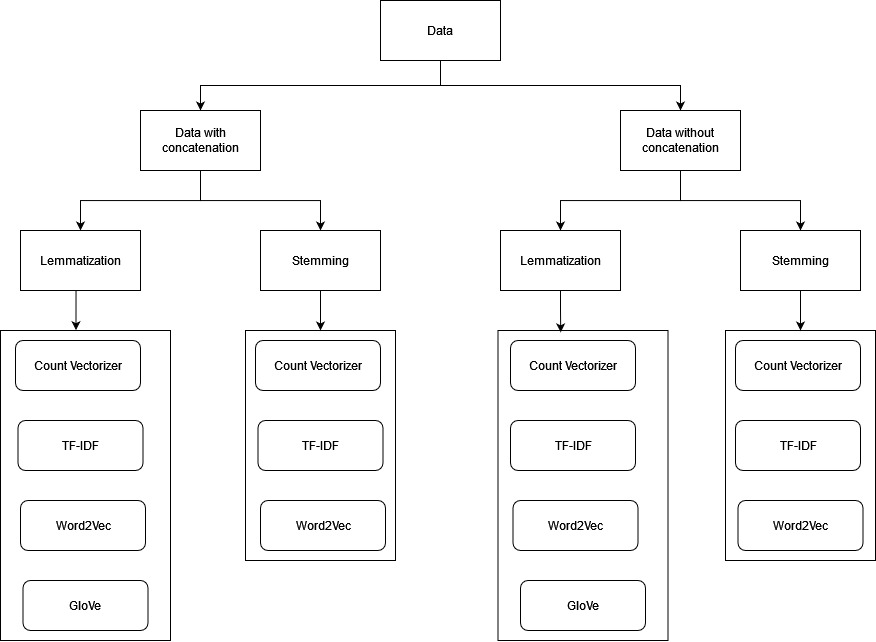

In [ ]:
# df.to_csv(project_path+"/updated_df.csv")

df = pd.read_csv(project_path+"/updated_df.csv")
# df = pd.read_csv("/content/updated_df.csv")

#Saving for later use

# Trying out ML models on all the Datasets.

## Algorithms:
* Naive Bayes - On Count Vectorizer and TF-IDF vectors
* Random Forest Classifier - - On Count Vectorizer and TF-IDF vectors

## Total models tried = 16

In [ ]:
param_grid = {'alpha':[0.5,1.0,1.5,2.0,2.5,3.0], 'fit_prior':[False,True]}
estimator = MultinomialNB()
Gscv = GridSearchCV(estimator, param_grid)

In [ ]:
mnb1 = MultinomialNB()
mnb2 = MultinomialNB()
mnb3 = MultinomialNB()
mnb4 = MultinomialNB()
mnb5 = MultinomialNB()
mnb6 = MultinomialNB()
mnb7 = MultinomialNB()
mnb8 = MultinomialNB()

In [ ]:
datasets = [data1.toarray(), data2.toarray(), tfidf_1.toarray(),tfidf_2.toarray(),data3.toarray(),tfidf_3.toarray(),data4.toarray(),
        tfidf_4.toarray()]

mnb = [mnb1,mnb2,mnb3,mnb4,mnb5,mnb6,mnb7,mnb8]     

dt = ["Count vectorizer - Description concatenated - Stemmed","Count vectorizer - Description without concatenated - Stemmed","TFIDF vectorizer - Stemmed data- without concatenated data"
, "TFIDF vectorizer - Stemmed data - with concatenated data", "Count vectorizer - Lemmatized data - with concatenated data"
, "TFIDF vectorizer - Lemmatized data- with concatenated data", "Count vectorizer - Lemmatized data - without concatenated data"
, "TFIDF vectorizer - Lemmatized data- without concatenated data"]

In [ ]:
Gscv.score(X_train,y_train)

0.7357142857142858

In [ ]:
Model_status = pd.DataFrame(columns=['Data','Training_score','Test_score'])
for i,j,k in zip(datasets,mnb,dt):
  print(k+"\n")
  X = i
  y = df['Accident Level']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  param_grid = {'alpha':[0.5,1.0,1.5,2.0,2.5,3.0], 'fit_prior':[False,True]}
  estimator = j
  Gscv = GridSearchCV(estimator, param_grid)
  Gscv.fit(X_train,y_train)
  prediction = Gscv.predict(X_test)
  Data = k
  Train_score = Gscv.score(X_train,y_train)
  Test_score = Gscv.score(X_test,y_test)
  Model_status = Model_status.append({'Data':Data,'Training_score':Train_score,'Test_score':Test_score},ignore_index=True)
  print(classification_report(y_test,prediction))
  # confusion_matrix(y_test,prediction)
  # print("\n")

  

Count vectorizer - Description concatenated - Stemmed

              precision    recall  f1-score   support

           I       0.74      0.98      0.85       103
          II       0.00      0.00      0.00        11
         III       0.00      0.00      0.00        10
          IV       0.00      0.00      0.00        12
           V       0.00      0.00      0.00         2

    accuracy                           0.73       138
   macro avg       0.15      0.20      0.17       138
weighted avg       0.55      0.73      0.63       138

Count vectorizer - Description without concatenated - Stemmed

              precision    recall  f1-score   support

           I       0.75      0.99      0.85       103
          II       0.00      0.00      0.00        11
         III       1.00      0.10      0.18        10
          IV       0.00      0.00      0.00        12
           V       0.00      0.00      0.00         2

    accuracy                           0.75       138
   macro avg 

## 1. Although the model's Training and Test Score looks fine with all of them being 70+ we notice the F1 score being completely biased towards Class 1. This is due to the huge influence of Class 1 data.

## 2. This bias in prediction comes inspite of tuning hyperparameters in Naive bayes Algorithm.

In [ ]:
Model_status

,Data,Training_score,Test_score
0,Count vectorizer - Description concatenated - ...,0.792857,0.731884
1,Count vectorizer - Description without concate...,0.796429,0.746377
2,TFIDF vectorizer - Stemmed data- without conca...,0.735714,0.746377
3,TFIDF vectorizer - Stemmed data - with concate...,0.735714,0.746377
4,Count vectorizer - Lemmatized data - with conc...,0.789286,0.746377
5,TFIDF vectorizer - Lemmatized data- with conca...,0.735714,0.746377
6,Count vectorizer - Lemmatized data - without c...,0.789286,0.746377
7,TFIDF vectorizer - Lemmatized data- without co...,0.735714,0.746377


## Trying Random Forest Classifier with 8 different dataset
* Count Vectorizer and TF-IDF vectorizer

In [ ]:
rfc1 = RandomForestClassifier()
rfc2 = RandomForestClassifier()
rfc3 = RandomForestClassifier()
rfc4 = RandomForestClassifier()
rfc5 = RandomForestClassifier()
rfc6 = RandomForestClassifier()
rfc7 = RandomForestClassifier()
rfc8 = RandomForestClassifier()

RFC = [rfc1,rfc2,rfc3,rfc4,rfc5,rfc6,rfc7,rfc8]     

In [ ]:
for i,j,k in zip(datasets,RFC,dt):
  print(k+"\n")
  X = i
  y = df['Accident Level']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  param_grid = {'n_estimators':[100,150,200,250],'max_depth':[None,8,6]}
  estimator = j
  Gscv = GridSearchCV(estimator, param_grid)
  Gscv.fit(X_train,y_train)
  prediction = Gscv.predict(X_test)
  Data = k
  Train_score = Gscv.score(X_train,y_train)
  Test_score = Gscv.score(X_test,y_test)
  prediction = Gscv.predict(X_test)
  Model_status = Model_status.append({'Data':Data,'Training_score':Train_score,'Test_score':Test_score},ignore_index=True)
  print(classification_report(y_test,prediction))
  # confusion_matrix(y_test,prediction)
  print("\n")

Count vectorizer - Description concatenated - Stemmed

              precision    recall  f1-score   support

           I       0.75      1.00      0.85       103
          II       0.00      0.00      0.00        11
         III       0.00      0.00      0.00        10
          IV       0.00      0.00      0.00        12
           V       0.00      0.00      0.00         2

    accuracy                           0.75       138
   macro avg       0.15      0.20      0.17       138
weighted avg       0.56      0.75      0.64       138



Count vectorizer - Description without concatenated - Stemmed

              precision    recall  f1-score   support

           I       0.75      1.00      0.85       103
          II       0.00      0.00      0.00        11
         III       0.00      0.00      0.00        10
          IV       0.00      0.00      0.00        12
           V       0.00      0.00      0.00         2

    accuracy                           0.75       138
   macro av

In [ ]:
Model_status

,Data,Training_score,Test_score
0,Count vectorizer - Description concatenated - ...,0.792857,0.731884
1,Count vectorizer - Description without concate...,0.796429,0.746377
2,TFIDF vectorizer - Stemmed data- without conca...,0.735714,0.746377
3,TFIDF vectorizer - Stemmed data - with concate...,0.735714,0.746377
4,Count vectorizer - Lemmatized data - with conc...,0.789286,0.746377
5,TFIDF vectorizer - Lemmatized data- with conca...,0.735714,0.746377
6,Count vectorizer - Lemmatized data - without c...,0.789286,0.746377
7,TFIDF vectorizer - Lemmatized data- without co...,0.735714,0.746377
8,Count vectorizer - Description concatenated - ...,0.739286,0.746377
9,Count vectorizer - Description without concate...,0.735714,0.746377


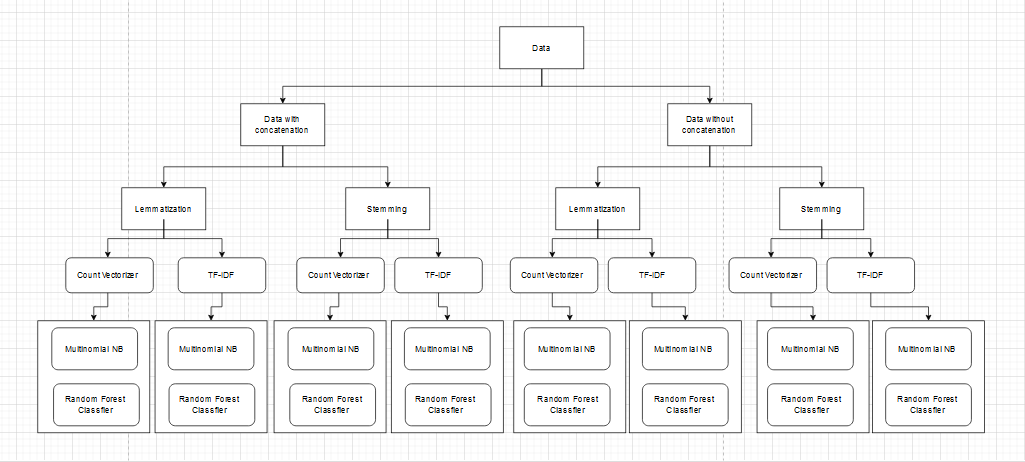


## 1. We notice that none of the 16 ML models that was developed using Count vectorizer and TF-IDF vectorizer with hyperparameter tuning performs well. From this we get to know that Class imbalance plays an important role in models performance. 




## 2. We will now move on to using Word2Vec and Glove embeddings on ANN without any  Class balancing to know its performance as well. We have tried Naive Bayes & Random Forest Classifier theorem. This will be the same with other ML algorithms but we haven't tried ANN (Artificial Neural Network), it might perform well.

* w2v - Word2vec - Stemmed data - with concatenated data
* w2v1 - Word2vec - Stemmed data - without concatenated data
* w2v_l1 - Word2vec - Lemmatized data - with concatenated data
* w2v_l2 - Word2vec - Lemmatized data - without concatenated data
* embedding_matrix_lemmatized - GloVe -  Lemmatized data - with concatenation
* embedding_matrix_lemmatized_c - GloVe - Lemmatized data - without concatenation




## 1. Applying Word2vec data in Simple Artificial neural network with few epochs, Dropout layers (Regularization) and Adam Optimizer

## Data: Word2vec - Stemmed data - with concatenated data 

In [ ]:
# word Tokenized to a list 
data_list = []
for i in df['Description_1Stemmed']:
    data_list.append(nltk.word_tokenize(i))
    
# List applied in Word2vec 
w2v = Word2Vec(sentences=data_list,size=100,min_count=1)
TK1 = Tokenizer()
TK1.fit_on_texts(df['Description_1Stemmed'])
# max([len(i) for i in TK1.texts_to_sequences(df['Description_1Stemmed'])])

# w2v vectors generated
w2v_vector_s_c = np.zeros((len(TK1.word_index)+1, 100))

for word, i in TK1.word_index.items():
  embedding_vector = w2v.wv.get_vector(word)
  if embedding_vector is not None:
      w2v_vector_s_c[i] = embedding_vector

# Dataframe converted to a sequence
data_1 = TK1.texts_to_sequences(df['Description_1Stemmed'])

In [ ]:
#Applying Label Encoder to classes/target
LE = LabelEncoder()
classes_actual = LE.fit_transform(df['Accident Level'])

#Padding sequences accordingly and creating target using dummies or to_categorical
X = pad_sequences(data_1,maxlen=102)
y = pd.get_dummies(classes_actual)

#Applying Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Simple ANN architecture
model_1 = Sequential()
model_1.add(Embedding(input_dim = len(TK1.word_index)+1,output_dim = 100, weights=[w2v_vector_s_c],input_length = 102))
model_1.add(Flatten())
model_1.add(Dense(500,activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(250,activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(120,activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(5,activation='softmax'))
model_1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_1.fit(X_train,y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
9/9 [==============================] - 2s 92ms/step - loss: 1.2781 - accuracy: 0.6786 - val_loss: 1.0332 - val_accuracy: 0.7464
Epoch 2/10
9/9 [==============================] - 1s 65ms/step - loss: 0.9963 - accuracy: 0.7357 - val_loss: 0.9727 - val_accuracy: 0.7464
Epoch 3/10
9/9 [==============================] - 1s 66ms/step - loss: 0.8515 - accuracy: 0.7357 - val_loss: 0.9196 - val_accuracy: 0.7464
Epoch 4/10
9/9 [==============================] - 1s 69ms/step - loss: 0.6919 - accuracy: 0.7357 - val_loss: 0.8969 - val_accuracy: 0.7464
Epoch 5/10
9/9 [==============================] - 1s 66ms/step - loss: 0.5625 - accuracy: 0.7357 - val_loss: 1.0010 - val_accuracy: 0.7464
Epoch 6/10
9/9 [==============================] - 1s 65ms/step - loss: 0.4756 - accuracy: 0.7357 - val_loss: 1.2627 - val_accuracy: 0.7464
Epoch 7/10
9/9 [==============================] - 1s 65ms/step - loss: 0.4378 - accuracy: 0.7393 - val_loss: 1.2373 - val_accuracy: 0.7464
Epoch 8/10
9/9 [===========

In [ ]:
prediction = model_1.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)

In [ ]:
print(classification_report(classes_actual,classes_pred))
#Here we notice that class II is getting predicted but still our priority is on Class IV & V

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       103
           1       0.20      0.09      0.13        11
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                           0.73       138
   macro avg       0.19      0.21      0.19       138
weighted avg       0.58      0.73      0.64       138



In [ ]:
confusion_matrix(classes_actual,classes_pred)

array([[100,   3,   0,   0,   0],
       [ 10,   1,   0,   0,   0],
       [  9,   1,   0,   0,   0],
       [ 12,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0]])

In [ ]:
Train_score = model_1.evaluate(X_train,y_train)
Test_score = model_1.evaluate(X_test,y_test)
Model_status = Model_status.append({'Data':"Word2vec - Stemmed data - with concatenated data","Training_score":Train_score,
                     "Test_score":Test_score},ignore_index=True)

5/5 [==============================] - 0s 11ms/step - loss: 1.5129 - accuracy: 0.7319


## 2. Applying Word2vec data in Simple Artificial neural network with few epochs,Dropout layers (Regularization) and Adam Optimizer

## Data: w2v1 - Word2vec - Stemmed data - without concatenated data


In [ ]:
# word Tokenized to a list 
data_list1 = []
for i in df['Description_Stemmed']:
    data_list1.append(nltk.word_tokenize(i))
    
# List applied in Word2vec 
w2v1 = Word2Vec(sentences=data_list1,size=100,min_count=1)
TK2 = Tokenizer()
TK2.fit_on_texts(df['Description_Stemmed'])
# max([len(i) for i in TK2.texts_to_sequences(df['Description_Stemmed'])])

# w2v vectors generated
w2v_vector_s = np.zeros((len(TK2.word_index)+1, 100))

for word, i in TK2.word_index.items():
  embedding_vector = w2v1.wv.get_vector(word)
  if embedding_vector is not None:
      w2v_vector_s[i] = embedding_vector

# Dataframe converted to a sequence
data_2 = TK2.texts_to_sequences(df['Description_Stemmed'])

In [ ]:
#Applying Label Encoder to classes/target
LE1 = LabelEncoder()
classes_actual = LE1.fit_transform(df['Accident Level'])

#Padding sequences accordingly and creating target using dummies or to_categorical
X = pad_sequences(data_2,maxlen=98)
y = pd.get_dummies(classes_actual)

#Applying Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Simple ANN architecture
model_2 = Sequential()
model_2.add(Embedding(input_dim = len(TK2.word_index)+1,output_dim = 100, weights=[w2v_vector_s],input_length = 98))
model_2.add(Flatten())
model_2.add(Dense(500,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(250,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(120,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(5,activation='softmax'))
model_2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_2.fit(X_train,y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
9/9 [==============================] - 1s 86ms/step - loss: 1.4065 - accuracy: 0.6357 - val_loss: 0.9127 - val_accuracy: 0.7464
Epoch 2/10
9/9 [==============================] - 1s 66ms/step - loss: 1.0280 - accuracy: 0.7321 - val_loss: 0.9353 - val_accuracy: 0.7464
Epoch 3/10
9/9 [==============================] - 1s 68ms/step - loss: 0.9140 - accuracy: 0.7357 - val_loss: 0.8766 - val_accuracy: 0.7464
Epoch 4/10
9/9 [==============================] - 1s 67ms/step - loss: 0.7199 - accuracy: 0.7357 - val_loss: 0.8798 - val_accuracy: 0.7464
Epoch 5/10
9/9 [==============================] - 1s 65ms/step - loss: 0.5449 - accuracy: 0.7357 - val_loss: 0.9652 - val_accuracy: 0.7464
Epoch 6/10
9/9 [==============================] - 1s 65ms/step - loss: 0.4578 - accuracy: 0.7357 - val_loss: 1.2265 - val_accuracy: 0.7464
Epoch 7/10
9/9 [==============================] - 1s 64ms/step - loss: 0.4339 - accuracy: 0.7357 - val_loss: 1.4977 - val_accuracy: 0.7464
Epoch 8/10
9/9 [===========

In [ ]:
prediction = model_2.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       103
           1       0.08      0.09      0.08        11
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                           0.69       138
   macro avg       0.17      0.20      0.18       138
weighted avg       0.57      0.69      0.62       138



In [ ]:
classes_actual.value_counts()

0    103
3     12
1     11
2     10
4      2
dtype: int64

In [ ]:
confusion_matrix(classes_actual,classes_pred)

array([[103,   0,   0,   0,   0],
       [ 11,   0,   0,   0,   0],
       [ 10,   0,   0,   0,   0],
       [ 12,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0]])

In [ ]:
Train_score = model_2.evaluate(X_train,y_train)
Test_score = model_2.evaluate(X_test,y_test)
Model_status = Model_status.append({'Data':"w2v1 - Word2vec - Stemmed data - without concatenated data","Training_score":Train_score,
                     "Test_score":Test_score},ignore_index=True)

5/5 [==============================] - 0s 10ms/step - loss: 1.5927 - accuracy: 0.6884


## 3. Applying Word2vec data in Simple Artificial neural network with few epochs
## Data: Word2vec - Lemmatized data - with concatenated data

In [ ]:
# word Tokenized to a list 
data_list2 = []
for i in df['Description_1lemmatized']:
    data_list2.append(nltk.word_tokenize(i))
    
# List applied in Word2vec 
w2v2 = Word2Vec(sentences=data_list2,size=100,min_count=1)
TK3 = Tokenizer()
TK3.fit_on_texts(df['Description_1lemmatized'])
# max([len(i) for i in TK3.texts_to_sequences(df['Description_1lemmatized'])])

# w2v vectors generated
w2v_vector_l_c = np.zeros((len(TK3.word_index)+1, 100))

for word, i in TK3.word_index.items():
  embedding_vector = w2v2.wv.get_vector(word)
  if embedding_vector is not None:
      w2v_vector_l_c[i] = embedding_vector

# Dataframe converted to a sequence
data_3 = TK3.texts_to_sequences(df['Description_1lemmatized'])

In [ ]:
#Applying Label Encoder to classes/target
LE2 = LabelEncoder()
classes_actual = LE2.fit_transform(df['Accident Level'])

#Padding sequences accordingly and creating target using dummies or to_categorical
X = pad_sequences(data_3,maxlen=102)
y = pd.get_dummies(classes_actual)

#Applying Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Simple ANN architecture
model_3 = Sequential()
model_3.add(Embedding(input_dim = len(TK3.word_index)+1,output_dim = 100, weights=[w2v_vector_l_c],input_length = 102))
model_3.add(Flatten())
model_3.add(Dense(500,activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(250,activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(120,activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(5,activation='softmax'))
model_3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_3.fit(X_train,y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
9/9 [==============================] - 1s 93ms/step - loss: 1.2977 - accuracy: 0.6571 - val_loss: 1.0146 - val_accuracy: 0.7464
Epoch 2/10
9/9 [==============================] - 1s 67ms/step - loss: 0.9249 - accuracy: 0.7357 - val_loss: 0.9148 - val_accuracy: 0.7464
Epoch 3/10
9/9 [==============================] - 1s 68ms/step - loss: 0.8196 - accuracy: 0.7357 - val_loss: 0.8717 - val_accuracy: 0.7464
Epoch 4/10
9/9 [==============================] - 1s 67ms/step - loss: 0.6721 - accuracy: 0.7357 - val_loss: 0.8924 - val_accuracy: 0.7464
Epoch 5/10
9/9 [==============================] - 1s 68ms/step - loss: 0.5261 - accuracy: 0.7357 - val_loss: 1.0712 - val_accuracy: 0.7464
Epoch 6/10
9/9 [==============================] - 1s 67ms/step - loss: 0.4551 - accuracy: 0.7357 - val_loss: 1.2323 - val_accuracy: 0.7464
Epoch 7/10
9/9 [==============================] - 1s 68ms/step - loss: 0.4321 - accuracy: 0.7464 - val_loss: 1.2937 - val_accuracy: 0.7464
Epoch 8/10
9/9 [===========

In [ ]:
prediction = model_3.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       103
           1       0.12      0.09      0.11        11
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                           0.71       138
   macro avg       0.17      0.21      0.19       138
weighted avg       0.57      0.71      0.63       138



In [ ]:
confusion_matrix(classes_actual,classes_pred)

array([[97,  6,  0,  0,  0],
       [10,  1,  0,  0,  0],
       [ 9,  1,  0,  0,  0],
       [12,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0]])

In [ ]:
Train_score = model_3.evaluate(X_train,y_train)
Test_score = model_3.evaluate(X_test,y_test)
Model_status = Model_status.append({'Data':"Word2vec - Lemmatized data - with concatenated data","Training_score":Train_score,
                     "Test_score":Test_score},ignore_index=True)

5/5 [==============================] - 0s 11ms/step - loss: 1.5420 - accuracy: 0.7101


## 4. Applying Word2vec data in Simple Artificial neural network with few epochs

## Data: Word2vec - Lemmatized data - without concatenated data

In [ ]:
# word Tokenized to a list 
data_list3 = []
for i in df['Description_lemmatized']:
    data_list3.append(nltk.word_tokenize(i))
    
# List applied in Word2vec 
w2v3 = Word2Vec(sentences=data_list3,size=100,min_count=1)
TK4 = Tokenizer()
TK4.fit_on_texts(df['Description_lemmatized'])
# max([len(i) for i in TK4.texts_to_sequences(df['Description_lemmatized'])])

# w2v vectors generated
w2v_vector_l = np.zeros((len(TK4.word_index)+1, 100))

for word, i in TK4.word_index.items():
  embedding_vector = w2v3.wv.get_vector(word)
  if embedding_vector is not None:
      w2v_vector_l[i] = embedding_vector

# Dataframe converted to a sequence
data_4 = TK4.texts_to_sequences(df['Description_lemmatized'])

In [ ]:
#Applying Label Encoder to classes/target
LE3 = LabelEncoder()
classes_actual = LE3.fit_transform(df['Accident Level'])

#Padding sequences accordingly and creating target using dummies or to_categorical
X = pad_sequences(data_4,maxlen=98)
y = pd.get_dummies(classes_actual)

#Applying Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Simple ANN architecture
model_4 = Sequential()
model_4.add(Embedding(input_dim = len(TK4.word_index)+1,output_dim = 100, weights=[w2v_vector_l],input_length = 98))
model_4.add(Flatten())
model_4.add(Dense(500,activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(250,activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(120,activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(5,activation='softmax'))
model_4.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_4.fit(X_train,y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
9/9 [==============================] - 1s 89ms/step - loss: 1.3434 - accuracy: 0.6750 - val_loss: 1.0429 - val_accuracy: 0.7464
Epoch 2/10
9/9 [==============================] - 1s 65ms/step - loss: 1.0528 - accuracy: 0.7357 - val_loss: 0.9634 - val_accuracy: 0.7464
Epoch 3/10
9/9 [==============================] - 1s 65ms/step - loss: 0.8244 - accuracy: 0.7357 - val_loss: 0.8999 - val_accuracy: 0.7464
Epoch 4/10
9/9 [==============================] - 1s 69ms/step - loss: 0.6636 - accuracy: 0.7357 - val_loss: 0.8968 - val_accuracy: 0.7464
Epoch 5/10
9/9 [==============================] - 1s 68ms/step - loss: 0.4969 - accuracy: 0.7357 - val_loss: 1.1793 - val_accuracy: 0.7464
Epoch 6/10
9/9 [==============================] - 1s 64ms/step - loss: 0.4491 - accuracy: 0.7357 - val_loss: 1.2310 - val_accuracy: 0.7464
Epoch 7/10
9/9 [==============================] - 1s 65ms/step - loss: 0.4233 - accuracy: 0.7607 - val_loss: 1.3263 - val_accuracy: 0.7464
Epoch 8/10
9/9 [===========

In [ ]:
prediction = model_4.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       103
           1       0.14      0.09      0.11        11
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                           0.72       138
   macro avg       0.18      0.21      0.19       138
weighted avg       0.58      0.72      0.64       138



In [ ]:
confusion_matrix(classes_actual,classes_pred)

array([[99,  4,  0,  0,  0],
       [10,  1,  0,  0,  0],
       [ 8,  2,  0,  0,  0],
       [12,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0]])

In [ ]:
Train_score = model_4.evaluate(X_train,y_train)
Test_score = model_4.evaluate(X_test,y_test)
Model_status = Model_status.append({'Data':"Word2vec - Lemmatized data - without concatenated data","Training_score":Train_score,
                     "Test_score":Test_score},ignore_index=True)

5/5 [==============================] - 0s 11ms/step - loss: 1.5535 - accuracy: 0.7246


## 5. Applying GloVe data in Simple Artificial neural network with few epochs

## embedding_matrix_lemmatized - GloVe - Lemmatized data - with concatenation

### Preloaded GloVe data in embedding_vectors

In [ ]:
embedding_vectors = {}
for i in open(project_path+"/glove_6B_100d.txt", encoding="utf8"):
    word = i.split(" ")[0]
    embedding = i.split(" ")[1:]
    embedding_vectors[word] = embedding

In [ ]:
# word Tokenized to a list 
data_list4 = []
for i in df['Description_1lemmatized']:
    data_list4.append(nltk.word_tokenize(i))
    
# List applied in Word2vec 
TK5 = Tokenizer()
TK5.fit_on_texts(df['Description_1lemmatized'])
# max([len(i) for i in TK5.texts_to_sequences(df['Description_1lemmatized'])])

# w2v vectors generated
GloVe_vector_l_c = np.zeros((len(TK5.word_index)+1, 100))
missed_words = []
for word, i in TK5.word_index.items():
  try:
    embedding_vector = embedding_vectors[word]
    if embedding_vector is not None:
        GloVe_vector_l_c[i] = embedding_vector
  except:
    missed_words.append(word)

# Dataframe converted to a sequence
data_5 = TK5.texts_to_sequences(df['Description_1lemmatized'])

In [ ]:
len(missed_words)

#Data/word loss

383

In [ ]:
#Applying Label Encoder to classes/target
LE4 = LabelEncoder()
classes_actual = LE4.fit_transform(df['Accident Level'])

#Padding sequences accordingly and creating target using dummies or to_categorical
X = pad_sequences(data_5,maxlen=102)
y = pd.get_dummies(classes_actual)

#Applying Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Simple ANN architecture
model_5 = Sequential()
model_5.add(Embedding(input_dim = len(TK5.word_index)+1,output_dim = 100, weights=[GloVe_vector_l_c],input_length = 102))
model_5.add(Flatten())
model_5.add(Dense(500,activation='relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(250,activation='relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(120,activation='relu'))
model_5.add(Dropout(0.5))
model_5.add(Dense(5,activation='softmax'))
model_5.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_5.fit(X_train,y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
9/9 [==============================] - 1s 95ms/step - loss: 1.2525 - accuracy: 0.6857 - val_loss: 0.9446 - val_accuracy: 0.7464
Epoch 2/10
9/9 [==============================] - 1s 69ms/step - loss: 1.3478 - accuracy: 0.6286 - val_loss: 0.9613 - val_accuracy: 0.7391
Epoch 3/10
9/9 [==============================] - 1s 66ms/step - loss: 1.1171 - accuracy: 0.6964 - val_loss: 0.9118 - val_accuracy: 0.7464
Epoch 4/10
9/9 [==============================] - 1s 69ms/step - loss: 1.1604 - accuracy: 0.7071 - val_loss: 0.9584 - val_accuracy: 0.7391
Epoch 5/10
9/9 [==============================] - 1s 68ms/step - loss: 0.9593 - accuracy: 0.7143 - val_loss: 1.0231 - val_accuracy: 0.7391
Epoch 6/10
9/9 [==============================] - 1s 68ms/step - loss: 0.9347 - accuracy: 0.7500 - val_loss: 1.0004 - val_accuracy: 0.7319
Epoch 7/10
9/9 [==============================] - 1s 69ms/step - loss: 0.7815 - accuracy: 0.7393 - val_loss: 1.1951 - val_accuracy: 0.7319
Epoch 8/10
9/9 [===========

In [ ]:
prediction = model_5.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84       103
           1       0.33      0.09      0.14        11
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                           0.73       138
   macro avg       0.22      0.21      0.20       138
weighted avg       0.58      0.73      0.64       138



In [ ]:
Train_score = model_5.evaluate(X_train,y_train)
Test_score = model_5.evaluate(X_test,y_test)
Model_status = Model_status.append({'Data':"GloVe - Lemmatized data - with concatenation","Training_score":Train_score,
                     "Test_score":Test_score},ignore_index=True)

5/5 [==============================] - 0s 12ms/step - loss: 1.2088 - accuracy: 0.7319


## 6. Applying GloVe data in Simple Artificial neural network with few epochs

## embedding_matrix_lemmatized_c - GloVe - Lemmatized data - without concatenation

### Preloaded GloVe data in embedding_vectors

In [ ]:
# word Tokenized to a list 
data_list5 = []
for i in df['Description_lemmatized']:
    data_list5.append(nltk.word_tokenize(i))
    
# List applied in Word2vec 
TK6 = Tokenizer()
TK6.fit_on_texts(df['Description_lemmatized'])
# max([len(i) for i in TK6.texts_to_sequences(df['Description_lemmatized'])])

# w2v vectors generated
GloVe_vector_l = np.zeros((len(TK6.word_index)+1, 100))
missed_words = []
for word, i in TK6.word_index.items():
  try:
    embedding_vector = embedding_vectors[word]
    if embedding_vector is not None:
        GloVe_vector_l[i] = embedding_vector
  except:
    missed_words.append(word)

# Dataframe converted to a sequence
data_6 = TK6.texts_to_sequences(df['Description_lemmatized'])

In [ ]:
len(missed_words)

#Data/word loss

380

In [ ]:
#Applying Label Encoder to classes/target
LE5 = LabelEncoder()
classes_actual = LE5.fit_transform(df['Accident Level'])

#Padding sequences accordingly and creating target using dummies or to_categorical
X = pad_sequences(data_6,maxlen=102)
y = pd.get_dummies(classes_actual)

#Applying Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Simple ANN architecture
model_6 = Sequential()
model_6.add(Embedding(input_dim = len(TK6.word_index)+1,output_dim = 100, weights=[GloVe_vector_l],input_length = 102))
model_6.add(Flatten())
model_6.add(Dense(500,activation='relu'))
model_6.add(Dropout(0.5))
model_6.add(Dense(250,activation='relu'))
model_6.add(Dropout(0.5))
model_6.add(Dense(120,activation='relu'))
model_6.add(Dropout(0.5))
model_6.add(Dense(5,activation='softmax'))
model_6.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

#Use weight initializer - batch normalization - 2 hidden layer - Try RNN, LSTM, BERT, Bidirectional LSTM, XLnet

In [ ]:
model_6.fit(X_train,y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
9/9 [==============================] - 1s 89ms/step - loss: 1.3302 - accuracy: 0.6250 - val_loss: 0.9478 - val_accuracy: 0.7464
Epoch 2/10
9/9 [==============================] - 1s 67ms/step - loss: 1.3213 - accuracy: 0.6571 - val_loss: 0.9919 - val_accuracy: 0.7464
Epoch 3/10
9/9 [==============================] - 1s 68ms/step - loss: 1.2492 - accuracy: 0.7143 - val_loss: 0.9581 - val_accuracy: 0.7464
Epoch 4/10
9/9 [==============================] - 1s 66ms/step - loss: 1.1290 - accuracy: 0.6857 - val_loss: 0.9582 - val_accuracy: 0.7464
Epoch 5/10
9/9 [==============================] - 1s 67ms/step - loss: 1.0194 - accuracy: 0.7250 - val_loss: 0.9047 - val_accuracy: 0.7464
Epoch 6/10
9/9 [==============================] - 1s 67ms/step - loss: 0.8773 - accuracy: 0.7321 - val_loss: 0.9165 - val_accuracy: 0.7391
Epoch 7/10
9/9 [==============================] - 1s 69ms/step - loss: 0.7347 - accuracy: 0.7393 - val_loss: 0.9235 - val_accuracy: 0.7391
Epoch 8/10
9/9 [===========

In [ ]:
prediction = model_6.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       103
           1       0.00      0.00      0.00        11
           2       0.40      0.20      0.27        10
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                           0.74       138
   macro avg       0.23      0.23      0.22       138
weighted avg       0.59      0.74      0.65       138



In [ ]:
Train_score = model_6.evaluate(X_train,y_train)
Test_score = model_6.evaluate(X_test,y_test)
Model_status = Model_status.append({'Data':"GloVe - Lemmatized data - without concatenation","Training_score":Train_score,
                     "Test_score":Test_score},ignore_index=True)

5/5 [==============================] - 0s 11ms/step - loss: 1.0964 - accuracy: 0.7391


In [ ]:
['Naive Bayes'*6,"Random Forest Classifier"*6]

['Naive BayesNaive BayesNaive BayesNaive BayesNaive BayesNaive Bayes',
 'Random Forest ClassifierRandom Forest ClassifierRandom Forest ClassifierRandom Forest ClassifierRandom Forest ClassifierRandom Forest Classifier']

In [ ]:
# Model_status['Algorithm'] = ['Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes',
#                              "Random Forest Classifier","Random Forest Classifier","Random Forest Classifier","Random Forest Classifier"
#                              ,"Random Forest Classifier","Random Forest Classifier","Random Forest Classifier","Random Forest Classifier","Artificial Neural Network","Artificial Neural Network"
#                              ,"Artificial Neural Network","Artificial Neural Network","Artificial Neural Network","Artificial Neural Network"]

In [ ]:
Model_status

,Data,Training_score,Test_score,Algorithm
0,Count vectorizer - Description concatenated - ...,0.792857,0.731884,Naive Bayes
1,Count vectorizer - Description without concate...,0.796429,0.746377,Naive Bayes
2,TFIDF vectorizer - Stemmed data- without conca...,0.735714,0.746377,Naive Bayes
3,TFIDF vectorizer - Stemmed data - with concate...,0.735714,0.746377,Naive Bayes
4,Count vectorizer - Lemmatized data - with conc...,0.789286,0.746377,Naive Bayes
5,TFIDF vectorizer - Lemmatized data- with conca...,0.735714,0.746377,Naive Bayes
6,Count vectorizer - Lemmatized data - without c...,0.789286,0.746377,Naive Bayes
7,TFIDF vectorizer - Lemmatized data- without co...,0.735714,0.746377,Naive Bayes
8,Count vectorizer - Description concatenated - ...,0.739286,0.746377,Random Forest Classifier
9,Count vectorizer - Description without concate...,0.735714,0.746377,Random Forest Classifier


# **Inference** :

### 1. We have applied the ANN model for all the data that we derived from Lemmatization and Stemming using Word2vec and GloVe.

### 2. We totally have 6 datasets so we have 6 ANN models with 3 hidden layers and Dropout, all the models support only in prediction of Accident level I as it contains 309 data out of 425 rows ie 73.92% of data.

### 3. The class/target imbalance is affecting the model's performance. The Accident level I contains 59% of data so that model fits only to Accident level I and not the others with less data

### 4. There were totally 22 models using Count vectorizer, TF-IDF, Word2Vec, GloVe. We notice that all these models performed bad despite having their hyperparameters tuned.

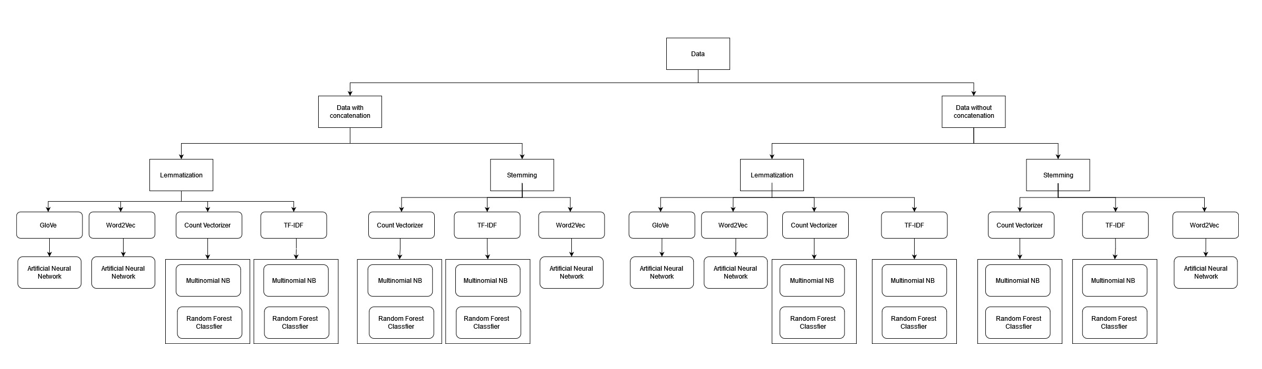


## The solution to get a better model is:

* Apply Data Augmentation techiniques to balance the classes 2,3,4 & 5. This will help the model to learn better and reduces bias towards class I.

* Instead of Artificial Neural Networks or other ML algorithms we will try RNN, LSTM, Bidirectional LSTM, BERT, XLNet & GRU as these support Sequential data, the input we have here will be a description that has sequential data.

* We have 6 different Sequential Neural Network algorithms. We will work on all the 6 models using Word2Vec and GloVe data to come up with best model using hyperparameter tuning in another 3 weeks time.


# End of Milestone1

# Milestone 2: [Duration: 2 weeks, Score: 20 points]
# Milestone 3: [Duration: 2 weeks, Score: 60 points]

## 1. Now that we were unable to get a good result on CV, TF-IDF, Word2Vec and GloVe on ML models & ANN, we will take another approach to get a good result. In the next approach we will not use CV & TF-IDF as they do not maintain the semantics. The datasets that we will use are 
  * GloVe_lemmatized_With_concatenation
  * GloVe_lemmatized_Without_concatenation
  * Word2Vec_Lemmatized_With_concatenation
  * Word2Vec_Lemmatized_Without_concatenation
  * Word2Vec_Stemmed_With_concatenation
  * Word2Vec_Stemmed_Without_concatenation


## 2. We will focus on using only **Sequential models** going forward for our problem. Sequential models maintains internal memory and hold them till the context changes, due to this they are very efficient for machine learning problems that involve sequential data. All the sentences that is written or created always contain sequence to it.
  * RNN
  * LSTM (Bi-Directional)
  * BERT
  * GRU (Bi-Directional)
  * XLNet

## 3. Next up will be Target balancing, even with a sequence model we will not be able to achieve a good result on all the accident levels. In order to balance the classes we will use few NLP Augmentation techniques as show below:
  * NLPAug Swap character randomly
  * NLPAug Random Word Swap Augmentation
  * NLPAug Back translation Augmentation


## Word2Vec objects: 
* w2v - Description_withconcat_stemmed_word2vec
* w2v1 - Description_withoutconcat_stemmed_word2vec
* w2v_l1 - Description_withconcat_lemmatized_word2vec
* w2v_l2 - Description_withoutconcat_lemmatized_word2vec

## GloVe Dictionary : 
* embedding_matrix_lemmatized - Description_withconcat_lemmatized_GloVe
* embedding_matrix_lemmatized_c - Description_withoutconcat_lemmatized_GloVe  


In [ ]:
df = pd.read_csv(project_path+"/updated_df.csv")
#Loading the saved dataset

In [ ]:
df['Accident Level'].value_counts()

#Augmentation is required for Class 2,3,4 & 5
#Class II,III,IV &V  - atleast 200 documents

I      309
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

# **NLP Augmentation Techniques:**

1. The dataset is heavily imbalanced which requires one to balance out the class V,IV,III,II to have a better and unbiased prediction. In order balance the minority classes we will need a technique that can synthetically generate additional data using existing data.

2. This is achieved using NLP Augmentation techniques. We have many options here but we will have to work on choosing the right one to get the better result.

3. Some of the techniques are :
  * NLP Character Augmenter - OCR, Keyboard, Random
  * NLP Word Augmenter - Spelling, Word Embeddings,  TF-IDF,  Contextual Word Embeddings, Synonym, Antonym, Random Word, Split, Back Translation,   Reserved Word
  * NLP Sentence Augmenter : Contextual Word Embeddings for Sentence,     Abstractive Summarization

4. The best techniques are back translation and Contextual Word Embedding but unfortunately running these 2 techniques require a lot of Memory to create Augmentation. It is not possible to create a **bert-base-uncased** or **xlnet-base-uncased** contextual embedding. These models make use of a pretrained models data to producec the augmented data which cannot be achieved without any hardware accelarators. Hence, we drop these 2 techniques

5. The next best techniques are Random Word swap or Synonm Augmenters. We will make use of these methods to generate augmented text and balance the dataset as it does not require special Hardware accelarators.

6. FYI : Google Colab comes with GPU options and very limited memory which gets overloaded while trying out Contextual word embedding and Back translation techniques and the kernel gets killed and restarted.





## Example of Random Word Swap Augmenter

In [ ]:
texts = 'The quick brown fox jumps over the lazy dog .'
aug = naf.Sequential([
    naw.RandomWordAug(action='swap')
])

augmented_text = aug.augment(texts, n=7)
print(augmented_text)
#Example of Random word augmentation

['The quick brown fox jumps the over lazy dog.', 'The brown quick jumps fox over the dog lazy.', 'The brown quick fox jumps over dog the lazy.', 'Quick brown the fox jumps over the dog lazy.', 'Quick the brown fox over jumps lazy the dog.', 'Quick the fox brown over jumps the lazy dog.', 'Quick brown the jumps fox over the lazy dog.']


## Example of Synonm Augmenter

In [ ]:
texts = 'The quick brown fox jumps over the lazy dog .'
aug = naf.Sequential([
    naw.SynonymAug(aug_src='wordnet')
])

augmented_text = aug.augment(texts, n=3)
print(augmented_text)

['The ready brownness fox jump over the lazy dog.', 'The quick john brown fox jumps over the slothful hotdog.', 'The straightaway brown fox jumps over the slothful blackguard.']


## Example of Contextual Word Embeddings for Sentence Augmenter - XLnet model - Time consuming

In [ ]:
texts = 'The quick brown fox jumps over the lazy dog .'
aug = nas.ContextualWordEmbsForSentenceAug(model_path='xlnet-base-cased')
augmented_texts = aug.augment(texts, n=3)
print("Original:")
print(texts)
print("Augmented Texts:")
print(augmented_texts)

## Example of Contextual Word Embeddings for Sentence Augmenter - BERT model - Time consuming

In [ ]:
text = 'The quick brown fox jumps over the lazy dog .'
aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")
augmented_text = aug.augment(text,n=2)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
['the quick working brown fox eagerly jumps carefully over the lazy dog.', 'besides the quick brown fox never jumps over one the lazy dog.']


## NLP Augmentation using nlpaug library:
  * Random Word Swap Augmentation on GloVe_lemmatized_With_concatenation
  * Random Word Swap Augmentation on GloVe_lemmatized_Without_concatenation
  * Random Word Swap Augmentation on Word2Vec_Lemmatized_With_concatenation
  * Random Word Swap Augmentation on Word2Vec_Lemmatized_Without_concatenation
  * Random Word Swap Augmentation on Word2Vec_Stemmed_With_concatenation
  * Random Word Swap Augmentation on Word2Vec_Stemmed_Without_concatenation




# Random Word Swap Augmentation on Word2Vec_Lemmatized_With_concatenation

In [ ]:
df = pd.read_csv(project_path+"/updated_df.csv")
#Loading the saved dataset

In [ ]:


X = df['Description_lemmatized']
y = df['Accident Level']

#Applying Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

new = pd.Series()
new1 = pd.Series()
# aug = naw.ContextualWordEmbsAug(model_path='xlnet-base-uncased', action="insert")
aug = naf.Sequential([
    naw.RandomWordAug(action='swap')
])
for i,j in zip(X_train,y_train):
  if j == "II":
    text = aug.augment(i, n=7)
    new = new.append(pd.Series(text),ignore_index=True)
    # y.append(i)
    # X = X.append(pd.Series(text),ignore_index=True)
    k=0
    while(k < 7):
      new1 = new1.append(pd.Series(j))
      k+=1

  elif j == "III" :
    text = aug.augment(i, n=8)
    new = new.append(pd.Series(text),ignore_index=True)
    # X = X.append(pd.Series(text),ignore_index=True)
    k=0
    while(k < 8):
      new1 = new1.append(pd.Series(j))
      k+=1

  elif j == "IV":
    text = aug.augment(i, n=12)
    new = new.append(pd.Series(text),ignore_index=True)
    # X = X.append(pd.Series(text),ignore_index=True)
    k=0
    while(k < 12):
      new1 = new1.append(pd.Series(j))
      k+=1      
    
  elif j == "V":
    text = aug.augment(i, n=35)
    new = new.append(pd.Series(text),ignore_index=True)
    k=0
    # X = X.append(pd.Series(text),ignore_index=True)
    while(k < 35):
      new1 = new1.append(pd.Series(j))
      # y = y.append(pd.Series(j))
      k+=1
  
  else:
    pass
X_train = X_train.append(new)
y_train = y_train.append(new1)

In [ ]:
y_train.value_counts()

IV     299
II     256
I      246
III    243
V      216
dtype: int64

In [ ]:
#Loading Glove Vectors
embedding_vectors = {}
for i in open(project_path+"/glove_6B_100d.txt", encoding="utf8"):
  word = i.split(" ")[0]
  embedding = i.split(" ")[1:]
  embedding_vectors[word] = embedding

TK77 = Tokenizer()
TK77.fit_on_texts(X)

# GloVe vectors generated
GloVe_vector_l1 = np.zeros((len(TK77.word_index)+1, 100))
missed_words = []
for word, i in TK77.word_index.items():
  try:
    embedding_vector = embedding_vectors[word]
    if embedding_vector is not None:
        GloVe_vector_l1[i] = embedding_vector
  except:
    missed_words.append(word)


# word Tokenized to a list 
data_list6 = []
for i in X_train:
    data_list6.append(nltk.word_tokenize(i))
    
# List applied in Word2vec 
TK7 = Tokenizer()
TK7.fit_on_texts(X_train)

data_7_train = TK7.texts_to_sequences(X_train)


#Applying Label Encoder to classes/target
LE6 = LabelEncoder()
classes_actual_train = LE6.fit_transform(y_train)

#Padding sequences accordingly and creating target using dummies or to_categorical
X_train = pad_sequences(data_7_train,maxlen=100)
y_train = pd.get_dummies(classes_actual_train)    

In [ ]:
# word Tokenized to a list 
data_list7 = []
for i in X_test:
    data_list7.append(nltk.word_tokenize(i))
    
# List applied in Word2vec 
TK8 = Tokenizer()
TK8.fit_on_texts(X_test)

# Dataframe converted to a sequence
data_7_test = TK8.texts_to_sequences(X_test)

#Applying Label Encoder to classes/target
LE7 = LabelEncoder()
classes_actual_test = LE7.fit_transform(y_test)

#Padding sequences accordingly and creating target using dummies or to_categorical
X_test = pad_sequences(data_7_test,maxlen=100)
y_test = pd.get_dummies(classes_actual_test)

## We will try out some of the Sequential models and finally try out BERT based models:

  
  * Recurrent Neural Networks (RNN)
  * Gated Recurrent Units (GRU)
  * Long Short Term Memory (LSTM)
  * Bi-Directional RNN
  * Bi-Directional LSTM
  * Bi-Directional GRU

  

In [ ]:
# #Dataframe to collect all the Sequential model's metrics

# Sequential_model_metrics = pd.DataFrame(columns=['Model_name','Dataset','Training_Accuracy','Test_Accuracy',"Classes_identified"])

In [ ]:
# Sequential_model_metrics




# Random Word Swap Augmentation on GloVe_lemmatized_With_concatenation - done
# Random Word Swap Augmentation on GloVe_lemmatized_Without_concatenation - done
# Random Word Swap Augmentation on Word2Vec_Lemmatized_With_concatenation
# Random Word Swap Augmentation on Word2Vec_Lemmatized_Without_concatenation
# Random Word Swap Augmentation on Word2Vec_Stemmed_With_concatenation
# Random Word Swap Augmentation on Word2Vec_Stemmed_Without_concatenation


In [ ]:
def Train_test_Data(x):
  print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
  print("The datatypes available are 'Description','Description_1','Description_1Stemmed','Description_1lemmatized','Description_Stemmed','Description_lemmatized'")
  print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
  datatype = str(input("Enter datatype that you would like to use "))
  print("----------------------------------------------------------")
  testsize = float(input("Enter test size options 0.1,0.2,0.3,0.4 "))
  X_train,X_test,y_train,y_test = train_test_split(x[datatype], x['Accident Level'], test_size=testsize, random_state=42)
  print("------------------------")
  print("Train Test split created")
  print("------------------------")
  print("Data Augmentation type: 'RandomWordAug','synonymaugmenter'")
  print("---------------------------------------")
  dataAugtype = str(input("Enter datatype that you would like to use ")).lower()
  if dataAugtype=='randomwordaug':
    aug = naf.Sequential([
    naw.RandomWordAug(action='swap')
    ])
  elif dataAugtype=='synonymaugmenter':
    aug = naf.Sequential([
    naw.SynonymAug(aug_src='wordnet')
    ])
  print("Data Augmentation object created")
  print("--------------------------------")
  print("Current Target value counts for Training data")
  print("---------------------------------------------")
  print(y_train.value_counts())
  print("--------------------------------")
  print(f"We have {y_train.nunique()} classes out of which our focus is on classes II,III,IV,V")
  print("------------------------------------------------------------------------------------")
  print("Enter count of times you want a class to be replicated")
  print("------------------------------------------------------")
  II = int(input("Enter the count of times you want class II replicated(Only integer allowed) "))
  print("------------------------------------------------------------------")
  III = int(input("Enter the count of times you want class III replicated(Only integer allowed) "))
  print("------------------------------------------------------------------")
  IV = int(input("Enter the count of times you want class IV replicated(Only integer allowed) "))
  print("------------------------------------------------------------------")
  V = int(input("Enter the count of times you want class V replicated(Only integer allowed) "))
  print("------------------------------------------------------------------")
  print("Replication numbers saved")
  print("---------------------------")
  new = pd.Series()
  new1 = pd.Series()
  for i,j in zip(X_train,y_train):
    if j == "II":
      text = aug.augment(i, n=II)
      new = new.append(pd.Series(text),ignore_index=True)
      k=0
      while(k < II):
        new1 = new1.append(pd.Series(j))
        k+=1
    elif j == "III" :
      text = aug.augment(i, n=III)
      new = new.append(pd.Series(text),ignore_index=True)
      k=0
      while(k < III):
        new1 = new1.append(pd.Series(j))
        k+=1

    elif j == "IV":
      text = aug.augment(i, n=IV)
      new = new.append(pd.Series(text),ignore_index=True)
      k=0
      while(k < IV):
        new1 = new1.append(pd.Series(j))
        k+=1
    elif j == "V":
      text = aug.augment(i, n=V)
      new = new.append(pd.Series(text),ignore_index=True)
      k=0
      while(k < V):
        new1 = new1.append(pd.Series(j))
        k+=1
    else:
      pass
  X_train = X_train.append(new)
  y_train = y_train.append(new1)
  print("Augmentation completed, check the class value counts")
  print("----------------------------------------------------")
  print(f"Target value counts for Training data post applying {dataAugtype} technique")
  print(y_train.value_counts())
  print("--------------------")
  print("Choice of vectors, GloVe ? or Word2Vec?")
  print("---------------------------------------")
  Vector_type = str(input("Please enter your input: 1. GloVe 2. Word2Vec")).lower()
  print("---------------------------------------------")
  if Vector_type == "glove":
    embedding_vectors = {}
    for i in open(project_path+"/glove_6B_100d.txt", encoding="utf8"):
        word = i.split(" ")[0]
        embedding = i.split(" ")[1:]
        embedding_vectors[word] = embedding
    print("Loaded GloVe vectors")
    print("--------------------")
    tokenizer_l = Tokenizer(num_words = 3452)
    tokenizer_l.fit_on_texts(x[datatype])
    text_tokenized_l = tokenizer_l.texts_to_sequences(x[datatype])
    embedding_matrix_lemmatized = np.zeros((len(tokenizer_l.word_index)+1, 100))
    missed_words = []
    for word, i in tokenizer_l.word_index.items():
        embedding_vector = embedding_vectors.get(word.replace("​​",""))
        if embedding_vector is not None:
            embedding_matrix_lemmatized[i] = embedding_vector
        else:
          missed_words.append(word)
    print("GloVe vectors generated")
    print("-----------------------")


    TK7 = Tokenizer()
    TK7.fit_on_texts(x[datatype])
    data_7_train = TK7.texts_to_sequences(X_train)
    print(y_train.value_counts())
    print("----------------------------------")
    LE6 = LabelEncoder()
    classes_actual_train = LE6.fit_transform(y_train)
    print("Label Encoding Target - Train data")
    print("----------------------------------")
    X_train = pad_sequences(data_7_train,maxlen=100)
    print("Padding X_train words as sequences")
    print("----------------------------------")
    y_train = pd.get_dummies(classes_actual_train)
    print("Target Train classes one hot encoded")
    print("------------------------------------")

    data_list7 = [nltk.word_tokenize(i) for i in X_test]
    TK8 = Tokenizer()
    TK8.fit_on_texts(X_test)      
    data_7_test = TK8.texts_to_sequences(X_test)
    LE7 = LabelEncoder()
    classes_actual_test = LE7.fit_transform(y_test)
    X_test = pad_sequences(data_7_test,maxlen=100)
    y_test = pd.get_dummies(classes_actual_test)
    data_list7 = [nltk.word_tokenize(i) for i in X_test]


    # TK9 = Tokenizer()
    # TK9.fit_on_texts(X_val)
    # WTS = str(input("Do you wish to see missed words? Yes or No")).lower()
    # print("------------------------------------------")
    # if WTS=='yes':
    #   print(missed_words)
    # else:
    #   pass
    # data_7_val = TK9.texts_to_sequences(X_val)
    # LE8 = LabelEncoder()
    # classes_actual_val = LE8.fit_transform(y_val)
    # X_val = pad_sequences(data_7_val,maxlen=100)
    # y_val = pd.get_dummies(classes_actual_val)


  elif Vector_type == "word2vec":

    data_list = [nltk.word_tokenize(i) for i in x[datatype]]  
    w2v = Word2Vec(sentences=data_list,size=100,min_count=1)        
    TK7 = Tokenizer()
    TK7.fit_on_texts(x[datatype])
    # data_7_train = TK7.texts_to_sequences(X_train)
    embedding_matrix_lemmatized = np.zeros((len(TK7.word_index)+1, 100))
    for word, i in TK7.word_index.items():
      embedding_vector = w2v.wv.get_vector(word)
      if embedding_vector is not None:
          embedding_matrix_lemmatized[i] = embedding_vector

    data_7_train = TK7.texts_to_sequences(X_train)
    LE6 = LabelEncoder()
    classes_actual_train = LE6.fit_transform(y_train)
    print("Label Encoding Target - Train data")
    print("----------------------------------")
    X_train = pad_sequences(data_7_train,maxlen=100)
    print("Padding X_train words as sequences")
    print("----------------------------------")
    y_train = pd.get_dummies(classes_actual_train)
    print("Target Train classes one hot encoded")
    print("------------------------------------")

    TK8 = Tokenizer()
    TK8.fit_on_texts(X_test)
    data_7_test = TK8.texts_to_sequences(X_test)
    LE7 = LabelEncoder()
    classes_actual_test = LE7.fit_transform(y_test)
    X_test = pad_sequences(data_7_test,maxlen=100)
    y_test = pd.get_dummies(classes_actual_test)

    # data_7_val = TK7.texts_to_sequences(X_val)
    # LE6 = LabelEncoder()
    # classes_actual_val = LE6.fit_transform(y_val)
    # print("Label Encoding Target - val data")
    # print("----------------------------------")
    # X_val = pad_sequences(data_7_val,maxlen=100)
    # print("Padding X_val words as sequences")
    # print("----------------------------------")
    # y_val = pd.get_dummies(classes_actual_val)
    # print("Target val classes one hot encoded")
    # print("------------------------------------")

  return X_train,X_test,y_train,y_test,TK7.word_index,embedding_matrix_lemmatized

In [ ]:
X_train,X_test,y_train,y_test,word_index,weights = Train_test_Data(df)

---------------------------------------------------------------------------------------------------------------------------------------------------------
The datatypes available are 'Description','Description_1','Description_1Stemmed','Description_1lemmatized','Description_Stemmed','Description_lemmatized'
---------------------------------------------------------------------------------------------------------------------------------------------------------
Enter datatype that you would like to use Description_1lemmatized
----------------------------------------------------------
Enter test size options 0.1,0.2,0.3,0.4 0.2
------------------------
Train Test split created
------------------------
Data Augmentation type: 'RandomWordAug','synonymaugmenter'
---------------------------------------
Enter datatype that you would like to use RandomWordAug
Data Augmentation object created
--------------------------------
Current Target value counts for Training data
---------------------------

## RNN model

In [ ]:
# X_train,X_test,y_train,y_test,word_index,weights

In [ ]:
model_7 = Sequential()
model_7.add(Embedding(input_dim = len(word_index)+1,output_dim = 100, weights=[weights],input_length = 100))
model_7.add(SimpleRNN(300, recurrent_dropout=0.2))
model_7.add(Flatten())
model_7.add(Dense(100, activation = 'relu'))
model_7.add(Dropout(0.2))
model_7.add(Dense(50, activation = 'relu'))
model_7.add(Dropout(0.2))
model_7.add(Dense(5, activation = 'softmax'))
adam = Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.9, epsilon=1e-04, amsgrad=False, name='Adam')
model_7.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_7.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 100)          344600    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 300)               120300    
                                                                 
 flatten_13 (Flatten)        (None, 300)               0         
                                                                 
 dense_39 (Dense)            (None, 100)               30100     
                                                                 
 dropout_26 (Dropout)        (None, 100)               0         
                                                                 
 dense_40 (Dense)            (None, 50)                5050      
                                                                 
 dropout_27 (Dropout)        (None, 50)              

In [ ]:
ES = EarlyStopping(monitor='val_loss', min_delta=0.01,patience=10,mode='min')
model_7.fit(X_train, y_train, epochs = 50,validation_data=(X_test,y_test),callbacks=[ES])

Epoch 1/50
35/35 [==============================] - 7s 165ms/step - loss: 1.6641 - accuracy: 0.1959 - val_loss: 1.5188 - val_accuracy: 0.0476
Epoch 2/50
35/35 [==============================] - 5s 154ms/step - loss: 1.6334 - accuracy: 0.2093 - val_loss: 1.5635 - val_accuracy: 0.0952
Epoch 3/50
35/35 [==============================] - 5s 155ms/step - loss: 1.6154 - accuracy: 0.2057 - val_loss: 1.5294 - val_accuracy: 0.7500
Epoch 4/50
35/35 [==============================] - 5s 156ms/step - loss: 1.6017 - accuracy: 0.2343 - val_loss: 1.5206 - val_accuracy: 0.0952
Epoch 5/50
35/35 [==============================] - 5s 154ms/step - loss: 1.5936 - accuracy: 0.2460 - val_loss: 1.5540 - val_accuracy: 0.0476
Epoch 6/50
35/35 [==============================] - 5s 156ms/step - loss: 1.3925 - accuracy: 0.3739 - val_loss: 1.5320 - val_accuracy: 0.0952
Epoch 7/50
35/35 [==============================] - 5s 155ms/step - loss: 1.3176 - accuracy: 0.4114 - val_loss: 1.5801 - val_accuracy: 0.1071
Epoch 

In [ ]:
prediction = model_7.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        63
           1       0.00      0.00      0.00         8
           2       0.17      0.25      0.20         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.63        84
   macro avg       0.19      0.22      0.20        84
weighted avg       0.58      0.63      0.60        84



In [ ]:
Train_score = model_7.evaluate(X_train,y_train)
Test_score = model_7.evaluate(X_test,y_test)

3/3 [==============================] - 0s 41ms/step - loss: 1.4958 - accuracy: 0.6310


In [ ]:
Sequential_model_metrics = Sequential_model_metrics.append({'Model_name':'Simple RNN','Dataset':'Lemmatized_withoutconcatenation_W2V','Training_Accuracy':Train_score,'Test_Accuracy':Test_score,'Classes_identified':2},ignore_index=True)

In [ ]:
Sequential_model_metrics.to_csv(project_path+"CapstoneSequence_model_performance.csv")

In [ ]:
Sequential_model_metrics

,Model_name,Dataset,Training_Accuracy,Test_Accuracy,Classes_identified
0,Simple RNN,Lemmatized_concatenated_GloVe,"[0.0036917212419211864, 0.9984126687049866]","[3.2730259895324707, 0.4166666567325592]",4
1,GRU,Lemmatized_concatenated_GloVe,"[0.0055404771119356155, 0.9968253970146179]","[7.728967666625977, 0.3452380895614624]",5
2,LSTM,Lemmatized_concatenated_GloVe,"[0.006871403660625219, 0.9968253970146179]","[4.108074188232422, 0.5952380895614624]",2
3,Bi-Directional RNN,Lemmatized_concatenated_GloVe,"[0.019844254478812218, 0.9936507940292358]","[4.39696741104126, 0.3571428656578064]",3
4,Bi-Directional GRU,Lemmatized_concatenated_GloVe,"[0.013464070856571198, 0.9968253970146179]","[4.739116668701172, 0.5476190447807312]",3
5,Bi-Directional LSTM,Lemmatized_concatenated_GloVe,"[0.006571796257048845, 0.9968253970146179]","[5.051074981689453, 0.6071428656578064]",3
6,Simple RNN,Lemmatized_withoutconcatenation_GloVe,"[0.006571796257048845, 0.9968253970146179]","[5.051074981689453, 0.6071428656578064]",3
7,GRU,Lemmatized_withoutconcatenation_GloVe,"[0.006952998694032431, 0.9952380657196045]","[20.249876022338867, 0.190476194024086]",3
8,LSTM,Lemmatized_withoutconcatenation_GloVe,"[0.01058152411133051, 0.9944444298744202]","[4.0623698234558105, 0.5595238208770752]",2
9,Bi-Directional RNN,Lemmatized_withoutconcatenation_GloVe,"[0.027981502935290337, 0.988095223903656]","[3.4791150093078613, 0.369047611951828]",1


## GRU model

In [ ]:
model_8 = Sequential()
model_8.add(Embedding(input_dim = len(word_index)+1,output_dim = 100, weights=[weights],input_length = 100))
model_8.add(GRU(300, recurrent_dropout=0.2))
model_8.add(Flatten())
model_8.add(Dense(100, activation = 'relu'))
model_8.add(Dropout(0.2))
model_8.add(Dense(50, activation = 'relu'))
model_8.add(Dropout(0.2))
model_8.add(Dense(5, activation = 'softmax'))
adam = Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.9, epsilon=1e-04, amsgrad=False, name='Adam')
model_8.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model_8.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 100, 100)          344600    
                                                                 
 gru_4 (GRU)                 (None, 300)               361800    
                                                                 
 flatten_14 (Flatten)        (None, 300)               0         
                                                                 
 dense_42 (Dense)            (None, 100)               30100     
                                                                 
 dropout_28 (Dropout)        (None, 100)               0         
                                                                 
 dense_43 (Dense)            (None, 50)                5050      
                                                                 
 dropout_29 (Dropout)        (None, 50)              

In [ ]:
ES = EarlyStopping(monitor='val_loss', min_delta=0.01,patience=10,mode='min')
model_8.fit(X_train, y_train, epochs = 50,validation_data=(X_test,y_test),callbacks=[ES])

Epoch 1/50
35/35 [==============================] - 31s 816ms/step - loss: 1.2858 - accuracy: 0.4222 - val_loss: 1.7562 - val_accuracy: 0.1429
Epoch 2/50
35/35 [==============================] - 28s 801ms/step - loss: 0.5285 - accuracy: 0.8256 - val_loss: 1.9498 - val_accuracy: 0.3571
Epoch 3/50
35/35 [==============================] - 28s 799ms/step - loss: 0.3604 - accuracy: 0.9070 - val_loss: 1.9341 - val_accuracy: 0.5476
Epoch 4/50
35/35 [==============================] - 28s 799ms/step - loss: 0.1100 - accuracy: 0.9687 - val_loss: 1.9934 - val_accuracy: 0.4405
Epoch 5/50
35/35 [==============================] - 28s 797ms/step - loss: 0.1010 - accuracy: 0.9741 - val_loss: 2.3249 - val_accuracy: 0.5238
Epoch 6/50
35/35 [==============================] - 28s 802ms/step - loss: 0.0491 - accuracy: 0.9848 - val_loss: 4.7549 - val_accuracy: 0.5952
Epoch 7/50
35/35 [==============================] - 28s 799ms/step - loss: 0.0922 - accuracy: 0.9794 - val_loss: 4.6006 - val_accuracy: 0.5476

In [ ]:
prediction = model_8.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        63
           1       0.00      0.00      0.00         8
           2       0.07      0.25      0.11         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.57        84
   macro avg       0.16      0.20      0.17        84
weighted avg       0.55      0.57      0.56        84



In [ ]:
Train_score = model_8.evaluate(X_train,y_train)
Test_score = model_8.evaluate(X_test,y_test)
Sequential_model_metrics = Sequential_model_metrics.append({'Model_name':'GRU','Dataset':'Lemmatized_withoutconcatenation_W2V','Training_Accuracy':Train_score,'Test_Accuracy':Test_score,'Classes_identified':2},ignore_index=True)

3/3 [==============================] - 0s 124ms/step - loss: 10.1716 - accuracy: 0.5714


In [ ]:
Sequential_model_metrics

,Model_name,Dataset,Training_Accuracy,Test_Accuracy,Classes_identified
0,Simple RNN,Lemmatized_concatenated_GloVe,"[0.0036917212419211864, 0.9984126687049866]","[3.2730259895324707, 0.4166666567325592]",4
1,GRU,Lemmatized_concatenated_GloVe,"[0.0055404771119356155, 0.9968253970146179]","[7.728967666625977, 0.3452380895614624]",5
2,LSTM,Lemmatized_concatenated_GloVe,"[0.006871403660625219, 0.9968253970146179]","[4.108074188232422, 0.5952380895614624]",2
3,Bi-Directional RNN,Lemmatized_concatenated_GloVe,"[0.019844254478812218, 0.9936507940292358]","[4.39696741104126, 0.3571428656578064]",3
4,Bi-Directional GRU,Lemmatized_concatenated_GloVe,"[0.013464070856571198, 0.9968253970146179]","[4.739116668701172, 0.5476190447807312]",3
5,Bi-Directional LSTM,Lemmatized_concatenated_GloVe,"[0.006571796257048845, 0.9968253970146179]","[5.051074981689453, 0.6071428656578064]",3
6,Simple RNN,Lemmatized_withoutconcatenation_GloVe,"[0.006571796257048845, 0.9968253970146179]","[5.051074981689453, 0.6071428656578064]",3
7,GRU,Lemmatized_withoutconcatenation_GloVe,"[0.006952998694032431, 0.9952380657196045]","[20.249876022338867, 0.190476194024086]",3
8,LSTM,Lemmatized_withoutconcatenation_GloVe,"[0.01058152411133051, 0.9944444298744202]","[4.0623698234558105, 0.5595238208770752]",2
9,Bi-Directional RNN,Lemmatized_withoutconcatenation_GloVe,"[0.027981502935290337, 0.988095223903656]","[3.4791150093078613, 0.369047611951828]",1


## LSTM

In [ ]:
model_9 = Sequential()
model_9.add(Embedding(input_dim = len(word_index)+1,output_dim = 100, weights=[weights],input_length = 100))
model_9.add(LSTM(300, recurrent_dropout=0.4))
model_9.add(Flatten())
model_9.add(Dense(100, activation = 'relu'))
model_9.add(Dropout(0.2))
model_9.add(Dense(50, activation = 'relu'))
model_9.add(Dropout(0.2))
model_9.add(Dense(5, activation = 'softmax'))
adam = Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.9, epsilon=1e-04, amsgrad=False, name='Adam')
model_9.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model_9.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 100, 100)          344600    
                                                                 
 lstm_4 (LSTM)               (None, 300)               481200    
                                                                 
 flatten_15 (Flatten)        (None, 300)               0         
                                                                 
 dense_45 (Dense)            (None, 100)               30100     
                                                                 
 dropout_30 (Dropout)        (None, 100)               0         
                                                                 
 dense_46 (Dense)            (None, 50)                5050      
                                                                 
 dropout_31 (Dropout)        (None, 50)              

In [ ]:
ES = EarlyStopping(monitor='val_loss', min_delta=0.01,patience=10,mode='min')
model_9.fit(X_train, y_train, epochs = 50,validation_data=(X_test,y_test),callbacks=[ES])

Epoch 1/50
35/35 [==============================] - 35s 931ms/step - loss: 1.4754 - accuracy: 0.3274 - val_loss: 1.4516 - val_accuracy: 0.3929
Epoch 2/50
35/35 [==============================] - 32s 923ms/step - loss: 1.0512 - accuracy: 0.5286 - val_loss: 1.5408 - val_accuracy: 0.2381
Epoch 3/50
35/35 [==============================] - 32s 923ms/step - loss: 0.8513 - accuracy: 0.6127 - val_loss: 1.4976 - val_accuracy: 0.7381
Epoch 4/50
35/35 [==============================] - 32s 918ms/step - loss: 0.4623 - accuracy: 0.7844 - val_loss: 2.1431 - val_accuracy: 0.5119
Epoch 5/50
35/35 [==============================] - 32s 922ms/step - loss: 0.5904 - accuracy: 0.8354 - val_loss: 2.5152 - val_accuracy: 0.6548
Epoch 6/50
35/35 [==============================] - 32s 918ms/step - loss: 0.1995 - accuracy: 0.9356 - val_loss: 2.6311 - val_accuracy: 0.5952
Epoch 7/50
35/35 [==============================] - 32s 917ms/step - loss: 0.1597 - accuracy: 0.9633 - val_loss: 3.1182 - val_accuracy: 0.6548

In [ ]:
prediction = model_9.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.63        84
   macro avg       0.15      0.17      0.16        84
weighted avg       0.54      0.63      0.58        84



In [ ]:
Train_score = model_9.evaluate(X_train,y_train)
Test_score = model_9.evaluate(X_test,y_test)
Sequential_model_metrics = Sequential_model_metrics.append({'Model_name':'LSTM','Dataset':'Lemmatized_withoutconcatenation_W2V','Training_Accuracy':Train_score,'Test_Accuracy':Test_score,'Classes_identified':1},ignore_index=True)

3/3 [==============================] - 0s 146ms/step - loss: 7.0671 - accuracy: 0.6310


In [ ]:
Sequential_model_metrics

,Model_name,Dataset,Training_Accuracy,Test_Accuracy,Classes_identified
0,Simple RNN,Lemmatized_concatenated_GloVe,"[0.0036917212419211864, 0.9984126687049866]","[3.2730259895324707, 0.4166666567325592]",4
1,GRU,Lemmatized_concatenated_GloVe,"[0.0055404771119356155, 0.9968253970146179]","[7.728967666625977, 0.3452380895614624]",5
2,LSTM,Lemmatized_concatenated_GloVe,"[0.006871403660625219, 0.9968253970146179]","[4.108074188232422, 0.5952380895614624]",2
3,Bi-Directional RNN,Lemmatized_concatenated_GloVe,"[0.019844254478812218, 0.9936507940292358]","[4.39696741104126, 0.3571428656578064]",3
4,Bi-Directional GRU,Lemmatized_concatenated_GloVe,"[0.013464070856571198, 0.9968253970146179]","[4.739116668701172, 0.5476190447807312]",3
5,Bi-Directional LSTM,Lemmatized_concatenated_GloVe,"[0.006571796257048845, 0.9968253970146179]","[5.051074981689453, 0.6071428656578064]",3
6,Simple RNN,Lemmatized_withoutconcatenation_GloVe,"[0.006571796257048845, 0.9968253970146179]","[5.051074981689453, 0.6071428656578064]",3
7,GRU,Lemmatized_withoutconcatenation_GloVe,"[0.006952998694032431, 0.9952380657196045]","[20.249876022338867, 0.190476194024086]",3
8,LSTM,Lemmatized_withoutconcatenation_GloVe,"[0.01058152411133051, 0.9944444298744202]","[4.0623698234558105, 0.5595238208770752]",2
9,Bi-Directional RNN,Lemmatized_withoutconcatenation_GloVe,"[0.027981502935290337, 0.988095223903656]","[3.4791150093078613, 0.369047611951828]",1


## Bi-Directional RNN

In [ ]:
model_10 = Sequential()
model_10.add(Embedding(input_dim = len(word_index)+1,output_dim = 100, weights=[weights],input_length = 100))
model_10.add(Bidirectional(SimpleRNN(300, recurrent_dropout=0.2)))
model_10.add(Flatten())
model_10.add(Dense(100, activation = 'relu'))
model_10.add(Dropout(0.2))
model_10.add(Dense(50, activation = 'relu'))
model_10.add(Dropout(0.2))
model_10.add(Dense(5, activation = 'softmax'))
adam = Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.9, epsilon=1e-04, amsgrad=False, name='Adam')
model_10.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_10.summary()
ES = EarlyStopping(monitor='val_loss', min_delta=0.01,patience=10,mode='min')
model_10.fit(X_train, y_train, epochs = 50,validation_data=(X_test,y_test),callbacks=[ES])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 100, 100)          344600    
                                                                 
 bidirectional_6 (Bidirectio  (None, 600)              240600    
 nal)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 600)               0         
                                                                 
 dense_48 (Dense)            (None, 100)               60100     
                                                                 
 dropout_32 (Dropout)        (None, 100)               0         
                                                                 
 dense_49 (Dense)            (None, 50)                5050      
                                                     

In [ ]:
prediction = model_10.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.10      1.00      0.17         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.10        84
   macro avg       0.02      0.20      0.03        84
weighted avg       0.01      0.10      0.02        84



In [ ]:
Train_score = model_10.evaluate(X_train,y_train)
Test_score = model_10.evaluate(X_test,y_test)
Sequential_model_metrics = Sequential_model_metrics.append({'Model_name':'Bi-Directional RNN','Dataset':'Lemmatized_withconcatenation_GloVe','Training_Accuracy':Train_score,'Test_Accuracy':Test_score,'Classes_identified':1},ignore_index=True)

3/3 [==============================] - 0s 49ms/step - loss: 1.5673 - accuracy: 0.0952


## BI-Directional  GRU

In [ ]:
model_11 = Sequential()
model_11.add(Embedding(input_dim = len(word_index)+1,output_dim = 100, weights=[weights],input_length = 100))
model_11.add(Bidirectional(GRU(300, recurrent_dropout=0.2)))
model_11.add(Flatten())
model_11.add(Dense(100, activation = 'relu'))
model_11.add(Dropout(0.2))
model_11.add(Dense(50, activation = 'relu'))
model_11.add(Dropout(0.2))
model_11.add(Dense(5, activation = 'softmax'))
adam = Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.9, epsilon=1e-04, amsgrad=False, name='Adam')
model_11.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model_11.summary()

ES = EarlyStopping(monitor='val_loss', min_delta=0.01,patience=10,mode='min')
model_11.fit(X_train, y_train, epochs = 50,validation_data=(X_test,y_test),callbacks=[ES])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 100, 100)          344600    
                                                                 
 bidirectional_8 (Bidirectio  (None, 600)              723600    
 nal)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 600)               0         
                                                                 
 dense_54 (Dense)            (None, 100)               60100     
                                                                 
 dropout_36 (Dropout)        (None, 100)               0         
                                                                 
 dense_55 (Dense)            (None, 50)                5050      
                                                     

In [ ]:
prediction = model_11.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.56      0.75      0.64        84



In [ ]:
Train_score = model_11.evaluate(X_train,y_train)
Test_score = model_11.evaluate(X_test,y_test)
Sequential_model_metrics = Sequential_model_metrics.append({'Model_name':'Bi-Directional GRU','Dataset':'Lemmatized_withconcatenation_W2V','Training_Accuracy':Train_score,'Test_Accuracy':Test_score,'Classes_identified':1},ignore_index=True)

3/3 [==============================] - 1s 220ms/step - loss: 6.4446 - accuracy: 0.7500


In [ ]:
Sequential_model_metrics

,Model_name,Dataset,Training_Accuracy,Test_Accuracy,Classes_identified
0,Simple RNN,Lemmatized_concatenated_GloVe,"[0.0036917212419211864, 0.9984126687049866]","[3.2730259895324707, 0.4166666567325592]",4
1,GRU,Lemmatized_concatenated_GloVe,"[0.0055404771119356155, 0.9968253970146179]","[7.728967666625977, 0.3452380895614624]",5
2,LSTM,Lemmatized_concatenated_GloVe,"[0.006871403660625219, 0.9968253970146179]","[4.108074188232422, 0.5952380895614624]",2
3,Bi-Directional RNN,Lemmatized_concatenated_GloVe,"[0.019844254478812218, 0.9936507940292358]","[4.39696741104126, 0.3571428656578064]",3
4,Bi-Directional GRU,Lemmatized_concatenated_GloVe,"[0.013464070856571198, 0.9968253970146179]","[4.739116668701172, 0.5476190447807312]",3
5,Bi-Directional LSTM,Lemmatized_concatenated_GloVe,"[0.006571796257048845, 0.9968253970146179]","[5.051074981689453, 0.6071428656578064]",3
6,Simple RNN,Lemmatized_withoutconcatenation_GloVe,"[0.006571796257048845, 0.9968253970146179]","[5.051074981689453, 0.6071428656578064]",3
7,GRU,Lemmatized_withoutconcatenation_GloVe,"[0.006952998694032431, 0.9952380657196045]","[20.249876022338867, 0.190476194024086]",3
8,LSTM,Lemmatized_withoutconcatenation_GloVe,"[0.01058152411133051, 0.9944444298744202]","[4.0623698234558105, 0.5595238208770752]",2
9,Bi-Directional RNN,Lemmatized_withoutconcatenation_GloVe,"[0.027981502935290337, 0.988095223903656]","[3.4791150093078613, 0.369047611951828]",1


## Bi-Directional LSTM

In [ ]:
model_12 = Sequential()
model_12.add(Embedding(input_dim = len(word_index)+1,output_dim = 100, weights=[weights],input_length = 100))
model_12.add(Bidirectional(LSTM(300, recurrent_dropout=0.4)))
model_12.add(Flatten())
model_12.add(Dense(100, activation = 'relu'))
model_12.add(Dropout(0.2))
model_12.add(Dense(50, activation = 'relu'))
model_12.add(Dropout(0.2))
model_12.add(Dense(5, activation = 'softmax'))
adam = Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.9, epsilon=1e-04, amsgrad=False, name='Adam')
model_12.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model_12.summary()
ES = EarlyStopping(monitor='val_accuracy', min_delta=0.01,patience=10,mode='max')
model_12.fit(X_train, y_train, epochs = 50,validation_data=(X_test,y_test),callbacks=[ES])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 100)          344600    
                                                                 
 bidirectional_9 (Bidirectio  (None, 600)              962400    
 nal)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 600)               0         
                                                                 
 dense_57 (Dense)            (None, 100)               60100     
                                                                 
 dropout_38 (Dropout)        (None, 100)               0         
                                                                 
 dense_58 (Dense)            (None, 50)                5050      
                                                     

In [ ]:
model_12

In [ ]:
prediction = model_12.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

In [ ]:
Train_score = model_12.evaluate(X_train,y_train)
Test_score = model_12.evaluate(X_test,y_test)
Sequential_model_metrics = Sequential_model_metrics.append({'Model_name':'Bi-Directional LSTM','Dataset':'Lemmatized_withconcatenation_W2V','Training_Accuracy':Train_score,'Test_Accuracy':Test_score,'Classes_identified':2},ignore_index=True)

3/3 [==============================] - 1s 277ms/step - loss: 7.3878 - accuracy: 0.6786


In [ ]:
Sequential_model_metrics

,Model_name,Dataset,Training_Accuracy,Test_Accuracy,Classes_identified
0,Simple RNN,Lemmatized_concatenated_GloVe,"[0.0036917212419211864, 0.9984126687049866]","[3.2730259895324707, 0.4166666567325592]",4
1,GRU,Lemmatized_concatenated_GloVe,"[0.0055404771119356155, 0.9968253970146179]","[7.728967666625977, 0.3452380895614624]",5
2,LSTM,Lemmatized_concatenated_GloVe,"[0.006871403660625219, 0.9968253970146179]","[4.108074188232422, 0.5952380895614624]",2
3,Bi-Directional RNN,Lemmatized_concatenated_GloVe,"[0.019844254478812218, 0.9936507940292358]","[4.39696741104126, 0.3571428656578064]",3
4,Bi-Directional GRU,Lemmatized_concatenated_GloVe,"[0.013464070856571198, 0.9968253970146179]","[4.739116668701172, 0.5476190447807312]",3
5,Bi-Directional LSTM,Lemmatized_concatenated_GloVe,"[0.006571796257048845, 0.9968253970146179]","[5.051074981689453, 0.6071428656578064]",3
6,Simple RNN,Lemmatized_withoutconcatenation_GloVe,"[0.006571796257048845, 0.9968253970146179]","[5.051074981689453, 0.6071428656578064]",3
7,GRU,Lemmatized_withoutconcatenation_GloVe,"[0.006952998694032431, 0.9952380657196045]","[20.249876022338867, 0.190476194024086]",3
8,LSTM,Lemmatized_withoutconcatenation_GloVe,"[0.01058152411133051, 0.9944444298744202]","[4.0623698234558105, 0.5595238208770752]",2
9,Bi-Directional RNN,Lemmatized_withoutconcatenation_GloVe,"[0.027981502935290337, 0.988095223903656]","[3.4791150093078613, 0.369047611951828]",1


## NLP Augmentation

In [ ]:
new = pd.Series()
new1 = pd.Series()
aug = naf.Sequential([
    naw.RandomWordAug(action='swap')
])
# aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")
# augmented_text = aug.augment(text,n=2)

for i,j in zip(X,y):
  if j == "II":
    text = aug.augment(i, n=7)
    new = new.append(pd.Series(text),ignore_index=True)
    # y.append(i)
    # X = X.append(pd.Series(text),ignore_index=True)
    k=0
    while(k < 7):
      new1 = new1.append(pd.Series(j))
      k+=1

  elif j == "III" or j == "IV":
    text = aug.augment(i, n=8)
    new = new.append(pd.Series(text),ignore_index=True)
    # X = X.append(pd.Series(text),ignore_index=True)
    k=0
    while(k < 8):
      new1 = new1.append(pd.Series(j))
      k+=1
    
  elif j == "V":
    text = aug.augment(i, n=35)
    new = new.append(pd.Series(text),ignore_index=True)
    k=0
    # X = X.append(pd.Series(text),ignore_index=True)
    while(k < 35):
      new1 = new1.append(pd.Series(j))
      # y = y.append(pd.Series(j))
      k+=1
  
  else:
    pass
X_train = X_train.append(new)
y_train = y_train.append(new1)

Test data

In [ ]:
def Train_test_Data(x):
  print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
  print("The datatypes available are 'Description','Description_1','Description_1Stemmed','Description_1lemmatized','Description_Stemmed','Description_lemmatized'")
  print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
  datatype = str(input("Enter datatype that you would like to use "))
  print("----------------------------------------------------------")
  testsize = float(input("Enter test size options 0.1,0.2,0.3,0.4 "))
  X_train,X_test,y_train,y_test = train_test_split(x[datatype], x['Accident Level'], test_size=testsize, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
  print("------------------------")
  print("Train Test Validation split created")
  print("------------------------")
  print("Data Augmentation type: 'RandomWordAug','synonymaugmenter'")
  print("---------------------------------------")
  dataAugtype = str(input("Enter datatype that you would like to use ")).lower()
  if dataAugtype=='randomwordaug':
    aug = naf.Sequential([
    naw.RandomWordAug(action='swap')
    ])
  elif dataAugtype=='synonymaugmenter':
    aug = naf.Sequential([
    naw.SynonymAug(aug_src='wordnet')
    ])
  print("Data Augmentation object created")
  print("--------------------------------")
  print("Current Target value counts for Training data")
  print("---------------------------------------------")
  print(y_train.value_counts())
  print("--------------------------------")
  print(f"We have {y_train.nunique()} classes out of which our focus is on classes II,III,IV,V")
  print("------------------------------------------------------------------------------------")
  print("Enter count of times you want a class to be replicated")
  print("------------------------------------------------------")
  II = int(input("Enter the count of times you want class II replicated(Only integer allowed) "))
  print("------------------------------------------------------------------")
  III = int(input("Enter the count of times you want class III replicated(Only integer allowed) "))
  print("------------------------------------------------------------------")
  IV = int(input("Enter the count of times you want class IV replicated(Only integer allowed) "))
  print("------------------------------------------------------------------")
  V = int(input("Enter the count of times you want class V replicated(Only integer allowed) "))
  print("------------------------------------------------------------------")
  print("Replication numbers saved")
  print("---------------------------")
  new = pd.Series()
  new1 = pd.Series()
  for i,j in zip(X_train,y_train):
    if j == "II":
      text = aug.augment(i, n=II)
      new = new.append(pd.Series(text),ignore_index=True)
      k=0
      while(k < II):
        new1 = new1.append(pd.Series(j))
        k+=1
    elif j == "III" :
      text = aug.augment(i, n=III)
      new = new.append(pd.Series(text),ignore_index=True)
      k=0
      while(k < III):
        new1 = new1.append(pd.Series(j))
        k+=1

    elif j == "IV":
      text = aug.augment(i, n=IV)
      new = new.append(pd.Series(text),ignore_index=True)
      k=0
      while(k < IV):
        new1 = new1.append(pd.Series(j))
        k+=1
    elif j == "V":
      text = aug.augment(i, n=V)
      new = new.append(pd.Series(text),ignore_index=True)
      k=0
      while(k < V):
        new1 = new1.append(pd.Series(j))
        k+=1
    else:
      pass
  X_train = X_train.append(new)
  y_train = y_train.append(new1)
  print("Augmentation completed, check the class value counts")
  print("----------------------------------------------------")
  print(f"Target value counts for Training data post applying {dataAugtype} technique")
  print(y_train.value_counts())
  print("--------------------")
  print("Choice of vectors, GloVe ? or Word2Vec?")
  print("---------------------------------------")
  Vector_type = str(input("Please enter your input: 1. GloVe 2. Word2Vec")).lower()
  print("---------------------------------------------")
  if Vector_type == "glove":
    embedding_vectors = {}
    for i in open(project_path+"/glove_6B_100d.txt", encoding="utf8"):
        word = i.split(" ")[0]
        embedding = i.split(" ")[1:]
        embedding_vectors[word] = embedding
    print("Loaded GloVe vectors")
    print("--------------------")
    tokenizer_l = Tokenizer(num_words = 3452)
    tokenizer_l.fit_on_texts(x[datatype])
    text_tokenized_l = tokenizer_l.texts_to_sequences(x[datatype])
    embedding_matrix_lemmatized = np.zeros((len(tokenizer_l.word_index)+1, 100))
    missed_words = []
    for word, i in tokenizer_l.word_index.items():
        embedding_vector = embedding_vectors.get(word.replace("​​",""))
        if embedding_vector is not None:
            embedding_matrix_lemmatized[i] = embedding_vector
        else:
          missed_words.append(word)
    print("GloVe vectors generated")
    print("-----------------------")


    TK7 = Tokenizer()
    TK7.fit_on_texts(x[datatype])
    data_7_train = TK7.texts_to_sequences(X_train)
    print(y_train.value_counts())
    print("----------------------------------")
    LE6 = LabelEncoder()
    classes_actual_train = LE6.fit_transform(y_train)
    print("Label Encoding Target - Train data")
    print("----------------------------------")
    X_train = pad_sequences(data_7_train,maxlen=100)
    print("Padding X_train words as sequences")
    print("----------------------------------")
    y_train = pd.get_dummies(classes_actual_train)
    print("Target Train classes one hot encoded")
    print("------------------------------------")

    data_list7 = [nltk.word_tokenize(i) for i in X_test]
    TK8 = Tokenizer()
    TK8.fit_on_texts(X_test)      
    data_7_test = TK8.texts_to_sequences(X_test)
    LE7 = LabelEncoder()
    classes_actual_test = LE7.fit_transform(y_test)
    X_test = pad_sequences(data_7_test,maxlen=100)
    y_test = pd.get_dummies(classes_actual_test)
    data_list7 = [nltk.word_tokenize(i) for i in X_test]


    TK9 = Tokenizer()
    TK9.fit_on_texts(X_val)
    WTS = str(input("Do you wish to see missed words? Yes or No")).lower()
    print("------------------------------------------")
    if WTS=='yes':
      print(missed_words)
    else:
      pass
    data_7_val = TK9.texts_to_sequences(X_val)
    LE8 = LabelEncoder()
    classes_actual_val = LE8.fit_transform(y_val)
    X_val = pad_sequences(data_7_val,maxlen=100)
    y_val = pd.get_dummies(classes_actual_val)


  elif Vector_type == "word2vec":

    data_list = [nltk.word_tokenize(i) for i in x[datatype]]  
    w2v = Word2Vec(sentences=data_list,size=100,min_count=1)        
    TK7 = Tokenizer()
    TK7.fit_on_texts(x[datatype])
    # data_7_train = TK7.texts_to_sequences(X_train)
    embedding_matrix_lemmatized = np.zeros((len(TK7.word_index)+1, 100))
    for word, i in TK7.word_index.items():
      embedding_vector = w2v.wv.get_vector(word)
      if embedding_vector is not None:
          embedding_matrix_lemmatized[i] = embedding_vector

    data_7_train = TK7.texts_to_sequences(X_train)
    LE6 = LabelEncoder()
    classes_actual_train = LE6.fit_transform(y_train)
    print("Label Encoding Target - Train data")
    print("----------------------------------")
    X_train = pad_sequences(data_7_train,maxlen=100)
    print("Padding X_train words as sequences")
    print("----------------------------------")
    y_train = pd.get_dummies(classes_actual_train)
    print("Target Train classes one hot encoded")
    print("------------------------------------")

    TK8 = Tokenizer()
    TK8.fit_on_texts(X_test)
    data_7_test = TK8.texts_to_sequences(X_test)
    LE7 = LabelEncoder()
    classes_actual_test = LE7.fit_transform(y_test)
    X_test = pad_sequences(data_7_test,maxlen=100)
    y_test = pd.get_dummies(classes_actual_test)

    data_7_val = TK7.texts_to_sequences(X_val)
    LE6 = LabelEncoder()
    classes_actual_val = LE6.fit_transform(y_val)
    print("Label Encoding Target - val data")
    print("----------------------------------")
    X_val = pad_sequences(data_7_val,maxlen=100)
    print("Padding X_val words as sequences")
    print("----------------------------------")
    y_val = pd.get_dummies(classes_actual_val)
    print("Target val classes one hot encoded")
    print("------------------------------------")

  return X_train,X_test,y_train,y_test,X_val,y_val,TK7.word_index,embedding_matrix_lemmatized

In [ ]:
X_train,X_test,y_train,y_test,X_val,y_val,word_index,weights = Train_test_Data(df)

---------------------------------------------------------------------------------------------------------------------------------------------------------
The datatypes available are 'Description','Description_1','Description_1Stemmed','Description_1lemmatized','Description_Stemmed','Description_lemmatized'
---------------------------------------------------------------------------------------------------------------------------------------------------------
Enter datatype that you would like to use Description_1lemmatized
----------------------------------------------------------
Enter test size options 0.1,0.2,0.3,0.4 0.2
------------------------
Train Test Validation split created
------------------------
Data Augmentation type: 'RandomWordAug','synonymaugmenter'
---------------------------------------
Enter datatype that you would like to use RandomWordAug
Data Augmentation object created
--------------------------------
Current Target value counts for Training data
----------------

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# print(len(TK7.word_index)+1)
# print(GloVe_vector_l1.shape)
# print(len(data_7_train))

(1319, 100)
(42, 100)
(1319, 5)
(42, 5)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

# print(len(TK7.word_index)+1)
# print(GloVe_vector_l1.shape)
# print(len(data_7_train))

In [ ]:
len(TK77.word_index)+1

3446

## Splitting Train data to Train and Validation split


In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
GloVe_vector_l1.shape

(3446, 100)

In [ ]:
model_7 = Sequential()
model_7.add(Embedding(input_dim = len(word_index)+1,output_dim = 100, weights=[weights],input_length = 100))
model_7.add(LSTM(300, return_sequences = True))
model_7.add(Bidirectional(LSTM(300, return_sequences = True)))
model_7.add(Flatten())
model_7.add(Dense(100, activation = 'relu'))
model_7.add(Dropout(0.2))
model_7.add(Dense(50, activation = 'relu'))
model_7.add(Dropout(0.2))
model_7.add(Dense(5, activation = 'softmax'))
adam = Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.9, epsilon=1e-04, amsgrad=False, name='Adam')
model_7.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model_7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          344600    
                                                                 
 lstm_5 (LSTM)               (None, 100, 300)          481200    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 600)         1442400   
 l)                                                              
                                                                 
 flatten_5 (Flatten)         (None, 60000)             0         
                                                                 
 dense_15 (Dense)            (None, 100)               6000100   
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                      

In [ ]:
ES = EarlyStopping(monitor='val_accuracy', min_delta=0.01,patience=10,mode='max')
# EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
model_7.fit(X_train, y_train, epochs = 30,validation_data=(X_val,y_val),callbacks=[ES])
# GloVe_vector_l1.shape

Epoch 1/30
27/27 [==============================] - 10s 173ms/step - loss: 2.5701 - accuracy: 0.2980 - val_loss: 5.5038 - val_accuracy: 0.0448
Epoch 2/30
27/27 [==============================] - 3s 110ms/step - loss: 3.4660 - accuracy: 0.3369 - val_loss: 1.5775 - val_accuracy: 0.0448
Epoch 3/30
27/27 [==============================] - 3s 109ms/step - loss: 2.1032 - accuracy: 0.2485 - val_loss: 1.5686 - val_accuracy: 0.0299
Epoch 4/30
27/27 [==============================] - 3s 110ms/step - loss: 1.6049 - accuracy: 0.2097 - val_loss: 1.5459 - val_accuracy: 0.8060
Epoch 5/30
27/27 [==============================] - 3s 109ms/step - loss: 1.6040 - accuracy: 0.2320 - val_loss: 1.5213 - val_accuracy: 0.8060
Epoch 6/30
27/27 [==============================] - 3s 110ms/step - loss: 1.6041 - accuracy: 0.2226 - val_loss: 1.5228 - val_accuracy: 0.8060
Epoch 7/30
27/27 [==============================] - 3s 110ms/step - loss: 1.6041 - accuracy: 0.2250 - val_loss: 1.5198 - val_accuracy: 0.8060
Epoch

In [ ]:
prediction = model_7.predict(X_val)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_val.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        54
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3

    accuracy                           0.81        67
   macro avg       0.16      0.20      0.18        67
weighted avg       0.65      0.81      0.72        67



In [ ]:
prediction = model_7.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        63
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.75        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.56      0.75      0.64        84



## Transformer based Models

In [ ]:
df = pd.read_csv(project_path+"/updated_df.csv")
X = df['Description_1lemmatized']
y = df['Accident Level']

#Applying Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_train.value_counts()

I      215
II      29
III     24
IV      18
V        6
Name: Accident Level, dtype: int64

In [ ]:
y_test.value_counts()

I      94
IV     12
II     11
III     7
V       2
Name: Accident Level, dtype: int64

In [ ]:
new = pd.Series()
new1 = pd.Series()
# aug = naw.ContextualWordEmbsAug(model_path='xlnet-base-uncased', action="insert")
aug = naf.Sequential([
    naw.SynonymAug()
])
for i,j in zip(X_train,y_train):
  if j == "II":
    text = aug.augment(i, n=8)
    new = new.append(pd.Series(text),ignore_index=True)
    # y.append(i)
    # X = X.append(pd.Series(text),ignore_index=True)
    k=0
    while(k < 8):
      new1 = new1.append(pd.Series(j))
      k+=1

  elif j == "III" :
    text = aug.augment(i, n=8)
    new = new.append(pd.Series(text),ignore_index=True)
    # X = X.append(pd.Series(text),ignore_index=True)
    k=0
    while(k < 8):
      new1 = new1.append(pd.Series(j))
      k+=1

  elif j == "IV":
    text = aug.augment(i, n=14)
    new = new.append(pd.Series(text),ignore_index=True)
    # X = X.append(pd.Series(text),ignore_index=True)
    k=0
    while(k < 14):
      new1 = new1.append(pd.Series(j))
      k+=1      
    
  elif j == "V":
    text = aug.augment(i, n=35)
    new = new.append(pd.Series(text),ignore_index=True)
    k=0
    # X = X.append(pd.Series(text),ignore_index=True)
    while(k < 35):
      new1 = new1.append(pd.Series(j))
      # y = y.append(pd.Series(j))
      k+=1
  
  else:
    pass
X_train = X_train.append(new)
y_train = y_train.append(new1)

In [ ]:
y_train.value_counts()

IV     270
II     261
III    216
V      216
I      215
dtype: int64

In [ ]:
LE7 = LabelEncoder()
classes_actual_test = LE7.fit_transform(y_test)
y_test = pd.get_dummies(classes_actual_test)

LE6 = LabelEncoder()
classes_actual_train = LE6.fit_transform(y_train)
y_train = pd.get_dummies(classes_actual_train)

## BERT based models - **bert_en_uncased Text embedding and Pre-processing**

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3, Total size: 1.96MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4, Total size: 429.66MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'.


## Neural Network with only BERT output, 30% dropout and softmax layer


In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.3, name="dropout1")(outputs['pooled_output'])
l = tf.keras.layers.Flatten()(l)
l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Recall(name='recall')
]
ADAM = Adam(learning_rate=0.08,epsilon=1e-02,name='Adam')
sgd = SGD(learning_rate=0.01, momentum=0.2, nesterov=True, name='SGD')
model.compile(optimizer=ADAM,
              loss='categorical_crossentropy',
              metrics=METRICS)

In [ ]:
ES = EarlyStopping(monitor='val_accuracy', min_delta=0.1,patience=10,mode='max',restore_best_weights=True,baseline=0.65)
RLRP = ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=2, verbose=1, mode='auto', min_delta=0.001)
model.fit(X_train, y_train, epochs=105,validation_data=(X_test,y_test),callbacks=[ES,RLRP])

Epoch 1/105
37/37 [==============================] - 26s 713ms/step - loss: 3.1868 - accuracy: 0.7922 - recall: 0.4716 - val_loss: 2.5968 - val_accuracy: 0.8524 - val_recall: 0.6270 - lr: 8.0000e-05
Epoch 2/105
37/37 [==============================] - 26s 694ms/step - loss: 2.8147 - accuracy: 0.8114 - recall: 0.5172 - val_loss: 2.5107 - val_accuracy: 0.8270 - val_recall: 0.5635 - lr: 8.0000e-05
Epoch 3/105
37/37 [==============================] - ETA: 0s - loss: 2.4985 - accuracy: 0.8179 - recall: 0.5319
Epoch 00003: ReduceLROnPlateau reducing learning rate to 7.999999797903001e-08.
37/37 [==============================] - 26s 697ms/step - loss: 2.4985 - accuracy: 0.8179 - recall: 0.5319 - val_loss: 2.5125 - val_accuracy: 0.8175 - val_recall: 0.5317 - lr: 8.0000e-05
Epoch 4/105
37/37 [==============================] - 26s 696ms/step - loss: 2.5254 - accuracy: 0.8238 - recall: 0.5457 - val_loss: 2.5125 - val_accuracy: 0.8175 - val_recall: 0.5317 - lr: 8.0000e-08
Epoch 5/105
37/37 [=====

In [ ]:
prediction = model.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        94
           1       0.00      0.00      0.00        11
           2       0.11      0.29      0.16         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                           0.63       126
   macro avg       0.18      0.22      0.19       126
weighted avg       0.58      0.63      0.60       126



## Universal Sentence Encoder - Google - Architecture1

In [ ]:
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/jeongukjae/roberta_en_cased_preprocess/1")
bert_encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-large/5")

INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-large/5'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder-large/5, Total size: 577.10MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-large/5'.


In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
outputs = bert_encoder(text_input)

# Neural network layers
l = tf.keras.layers.Dropout(0.3, name="dropout1")(outputs)
l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model1 = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Recall(name='recall')
]
ADAM = Adam(learning_rate=0.08,epsilon=1e-02,name='Adam')
sgd = SGD(learning_rate=0.01, momentum=0.2, nesterov=True, name='SGD')
model1.compile(optimizer=ADAM,
              loss='categorical_crossentropy',
              metrics=METRICS)

In [ ]:
ES = EarlyStopping(monitor='val_accuracy', min_delta=0.1,patience=10,mode='max',restore_best_weights=True)
RLRP = ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=2, verbose=1, mode='auto', min_delta=0.001)
model1.fit(X_train, y_train, epochs=105,validation_data=(X_test,y_test),callbacks=[ES])

Epoch 1/105
37/37 [==============================] - 23s 369ms/step - loss: 1.5327 - accuracy: 0.8000 - recall: 0.0000e+00 - val_loss: 1.6143 - val_accuracy: 0.8000 - val_recall: 0.0000e+00
Epoch 2/105
37/37 [==============================] - 4s 120ms/step - loss: 1.2956 - accuracy: 0.8007 - recall: 0.0034 - val_loss: 1.5158 - val_accuracy: 0.8000 - val_recall: 0.0000e+00
Epoch 3/105
37/37 [==============================] - 4s 115ms/step - loss: 1.0831 - accuracy: 0.8238 - recall: 0.1207 - val_loss: 1.4276 - val_accuracy: 0.8079 - val_recall: 0.0397
Epoch 4/105
37/37 [==============================] - 5s 123ms/step - loss: 0.9126 - accuracy: 0.8657 - recall: 0.3388 - val_loss: 1.4169 - val_accuracy: 0.8016 - val_recall: 0.0556
Epoch 5/105
37/37 [==============================] - 5s 122ms/step - loss: 0.7972 - accuracy: 0.8960 - recall: 0.5000 - val_loss: 1.4323 - val_accuracy: 0.7984 - val_recall: 0.0794
Epoch 6/105
37/37 [==============================] - 4s 116ms/step - loss: 0.7132 

In [ ]:
prediction = model1.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.87      0.14      0.24        94
           1       0.15      0.36      0.21        11
           2       0.06      0.29      0.10         7
           3       0.03      0.08      0.05        12
           4       0.05      0.50      0.08         2

    accuracy                           0.17       126
   macro avg       0.23      0.27      0.14       126
weighted avg       0.67      0.17      0.21       126



In [ ]:
# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
# preprocessed_text = bert_preprocess(text_input)
# outputs = bert_encoder(preprocessed_text)

# # Neural network layers
# l = tf.keras.layers.Dropout(0.1, name="dropout1")(outputs['pooled_output'])
# # l = tf.keras.layers.Bidirectional(LS(300))(l)
# # l = tf.keras.layers.Dense(100, activation='relu')(l)
# # l = tf.keras.layers.Dropout(0.2, name="dropout2")(l)
# l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)

# # Use inputs and outputs to construct a final model
# model = tf.keras.Model(inputs=[text_input], outputs = [l])

## Universal Sentence Encoder - Google - Architecture2

In [ ]:
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/jeongukjae/roberta_en_cased_preprocess/1")
bert_encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='Universal_Sentence_Encoder-Google')
outputs = bert_encoder(text_input)

# Neural network layers
l = tf.keras.layers.Dropout(0.4, name="dropout1")(outputs)
l = tf.keras.layers.Dense(350, activation='relu')(l)
l = tf.keras.layers.Dropout(0.3, name="dropout5")(l)
l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model2 = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Universal_Sentence_Encoder-  [(None,)]                0         
 Google (InputLayer)                                             
                                                                 
 keras_layer_3 (KerasLayer)  (None, 512)               147354880 
                                                                 
 dropout1 (Dropout)          (None, 512)               0         
                                                                 
 dense_63 (Dense)            (None, 350)               179550    
                                                                 
 dropout5 (Dropout)          (None, 350)               0         
                                                                 
 output (Dense)              (None, 5)                 1755      
                                                           

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Recall(name='recall')
]
ADAM = Adam(learning_rate=0.08,epsilon=1e-04,name='Adam')
sgd = SGD(learning_rate=0.01, momentum=0.2, nesterov=True, name='SGD')
model2.compile(optimizer=ADAM,
              loss='categorical_crossentropy',
              metrics=METRICS)

In [ ]:
ES = EarlyStopping(monitor='val_accuracy', min_delta=0.01,patience=10,mode='max',restore_best_weights=True)
RLRP = ReduceLROnPlateau(monitor='val_accuracy', factor=0.0001, patience=5, verbose=1, mode='auto', min_delta=0.001)
model2.fit(X_train, y_train, epochs=105,validation_data=(X_test,y_test),callbacks=[ES])

Epoch 1/105
37/37 [==============================] - 67s 2s/step - loss: 1.0767 - accuracy: 0.8509 - recall: 0.4244 - val_loss: 1.5034 - val_accuracy: 0.7635 - val_recall: 0.2143
Epoch 2/105
37/37 [==============================] - 47s 1s/step - loss: 0.5466 - accuracy: 0.9178 - recall: 0.7487 - val_loss: 1.5164 - val_accuracy: 0.7952 - val_recall: 0.4127
Epoch 3/105
37/37 [==============================] - 48s 1s/step - loss: 0.4762 - accuracy: 0.9292 - recall: 0.7903 - val_loss: 1.3586 - val_accuracy: 0.8159 - val_recall: 0.4127
Epoch 4/105
37/37 [==============================] - 46s 1s/step - loss: 0.4075 - accuracy: 0.9394 - recall: 0.8132 - val_loss: 1.7246 - val_accuracy: 0.8032 - val_recall: 0.4365
Epoch 5/105
37/37 [==============================] - 46s 1s/step - loss: 0.4021 - accuracy: 0.9428 - recall: 0.8234 - val_loss: 1.7748 - val_accuracy: 0.8048 - val_recall: 0.3889
Epoch 6/105
37/37 [==============================] - 46s 1s/step - loss: 0.4147 - accuracy: 0.9396 - reca

In [ ]:
prediction = model2.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        94
           1       0.18      0.18      0.18        11
           2       0.17      0.14      0.15         7
           3       0.29      0.17      0.21        12
           4       0.14      0.50      0.22         2

    accuracy                           0.65       126
   macro avg       0.32      0.36      0.31       126
weighted avg       0.65      0.65      0.65       126



## Model 2 pickled

In [ ]:
model2.save(project_path+"Googleencoder_Arch2.h5")

## Universal Sentence Encoder - Google - Architecture3

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
outputs = bert_encoder(text_input)

# Neural network layers
l = tf.keras.layers.Dropout(0.4, name="dropout1")(outputs)
l = tf.keras.layers.Dense(350, activation='relu')(l)
l = tf.keras.layers.Dropout(0.4, name="dropout2")(l)
l = tf.keras.layers.Dense(150, activation='relu')(l)
l = tf.keras.layers.Dropout(0.4, name="dropout3")(l)
l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)



# Use inputs and outputs to construct a final model
model3 = tf.keras.Model(inputs=[text_input], outputs = [l])

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Recall(name='recall')
]
ADAM = Adam(learning_rate=0.08,epsilon=1e-02,name='Adam')
sgd = SGD(learning_rate=0.01, momentum=0.2, nesterov=True, name='SGD')
model3.compile(optimizer=ADAM,
              loss='categorical_crossentropy',
              metrics=METRICS)

ES = EarlyStopping(monitor='val_accuracy', min_delta=0.01,patience=10,mode='max',restore_best_weights=True)
RLRP = ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=2, verbose=1, mode='auto', min_delta=0.001)
model3.fit(X_train, y_train, epochs=105,validation_data=(X_test,y_test),callbacks=[ES])

Epoch 1/105
37/37 [==============================] - 23s 356ms/step - loss: 1.5499 - accuracy: 0.8005 - recall: 0.0043 - val_loss: 1.4548 - val_accuracy: 0.7968 - val_recall: 0.0000e+00
Epoch 2/105
37/37 [==============================] - 4s 116ms/step - loss: 1.1666 - accuracy: 0.8252 - recall: 0.2810 - val_loss: 1.7798 - val_accuracy: 0.7270 - val_recall: 0.0397
Epoch 3/105
37/37 [==============================] - 6s 155ms/step - loss: 0.7691 - accuracy: 0.8828 - recall: 0.5983 - val_loss: 1.2127 - val_accuracy: 0.8238 - val_recall: 0.4206
Epoch 4/105
37/37 [==============================] - 5s 146ms/step - loss: 0.6685 - accuracy: 0.8986 - recall: 0.6750 - val_loss: 1.0225 - val_accuracy: 0.8651 - val_recall: 0.5635
Epoch 5/105
37/37 [==============================] - 5s 122ms/step - loss: 0.5742 - accuracy: 0.9067 - recall: 0.6991 - val_loss: 1.3071 - val_accuracy: 0.8190 - val_recall: 0.4365
Epoch 6/105
37/37 [==============================] - 5s 124ms/step - loss: 0.6467 - accura

In [ ]:
prediction = model3.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        94
           1       0.50      0.09      0.15        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         2

    accuracy                           0.69       126
   macro avg       0.26      0.20      0.20       126
weighted avg       0.63      0.69      0.64       126



## Universal Sentence Encoder - Google - Architecture4

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
outputs = bert_encoder(text_input)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout1")(outputs)
l = tf.keras.layers.Embedding(input_dim = 512+1,output_dim = 500)(l)
l = tf.keras.layers.SimpleRNN(300, return_sequences = True)(l)
l = tf.keras.layers.Flatten()(l)
l = tf.keras.layers.Dense(100,activation='relu')(l)
l = tf.keras.layers.Dense(5, activation='softmax', name="output")(l)



# Use inputs and outputs to construct a final model
model4 = tf.keras.Model(inputs=[text_input], outputs = [l])

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Recall(name='recall')
]
ADAM = Adam(learning_rate=0.08,epsilon=1e-02,name='Adam')
sgd = SGD(learning_rate=0.01, momentum=0.2, nesterov=True, name='SGD')
model4.compile(optimizer=ADAM,
              loss='categorical_crossentropy',
              metrics=METRICS)

ES = EarlyStopping(monitor='val_accuracy', min_delta=0.01,patience=10,mode='max',restore_best_weights=True)
RLRP = ReduceLROnPlateau(monitor='val_accuracy', factor=0.001, patience=2, verbose=1, mode='auto', min_delta=0.001)
model4.fit(X_train, y_train, epochs=105,validation_data=(X_test,y_test),callbacks=[ES])

Epoch 1/105
37/37 [==============================] - 54s 1s/step - loss: 790.8370 - accuracy: 0.7470 - recall: 0.0849 - val_loss: 1.6264 - val_accuracy: 0.8000 - val_recall: 0.0000e+00
Epoch 2/105
37/37 [==============================] - 33s 902ms/step - loss: 1.6065 - accuracy: 0.8000 - recall: 0.0000e+00 - val_loss: 1.6864 - val_accuracy: 0.8000 - val_recall: 0.0000e+00
Epoch 3/105
37/37 [==============================] - 32s 872ms/step - loss: 1.6075 - accuracy: 0.8000 - recall: 0.0000e+00 - val_loss: 1.6516 - val_accuracy: 0.8000 - val_recall: 0.0000e+00
Epoch 4/105
37/37 [==============================] - 33s 890ms/step - loss: 1.6069 - accuracy: 0.8000 - recall: 0.0000e+00 - val_loss: 1.6398 - val_accuracy: 0.8000 - val_recall: 0.0000e+00
Epoch 5/105
37/37 [==============================] - 33s 888ms/step - loss: 1.6075 - accuracy: 0.8000 - recall: 0.0000e+00 - val_loss: 1.6579 - val_accuracy: 0.8000 - val_recall: 0.0000e+00
Epoch 6/105
37/37 [==============================] - 33

In [ ]:
prediction = model4.predict(X_test)
value,classes_pred = tf.math.top_k(prediction, k=1, sorted=True, name=None)
classes_actual = y_test.idxmax(axis=1)
print(classification_report(classes_actual,classes_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         7
           3       0.10      1.00      0.17        12
           4       0.00      0.00      0.00         2

    accuracy                           0.10       126
   macro avg       0.02      0.20      0.03       126
weighted avg       0.01      0.10      0.02       126



## 1. On the whole the Universal Sentence Encoder - Google - Architecture2 performs the best and hence we pickle the model and use it for future use.

## 2. Although we have managed to get a better model to predict all the classes, we still dont have a very good F1 score for all models.

## 3. Once the model is deployed in production environment, we will focus on gathering all the inputs given by customers and the prediction shared by us. Along with this we will also focus on getting the feedback from customers or identify the actual accident levels and focus on identifying the Data and Concept Drift.

## 4. Through this we will also be able to identify the model's performance and retrain once we get enough data.


# End of Milestone2

